In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
tsr_train = np.array([1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
tsr_test = np.array([2.0])

tsr_train = np.reshape(tsr_train, (11, 1, 1, 1))
tsr_test = np.reshape(tsr_test, (1, 1, 1, 1))

In [5]:
input_img = tf.keras.Input(shape=(100, 100, 1), name='input_img')
input_tsr = tf.keras.Input(shape=(1, 1, 1), name='input_tsr')

x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

reshape1 = tf.keras.layers.Reshape((encoded.shape[1]*encoded.shape[2]*encoded.shape[3], 1))(encoded)
reshape2 = tf.keras.layers.Reshape((input_tsr.shape[1]*input_tsr.shape[2]*input_tsr.shape[3], 1))(input_tsr)
concatt = tf.keras.layers.Concatenate(axis=1)([reshape1, reshape2])
flatten = tf.keras.layers.Flatten()(concatt)
out = tf.keras.layers.Dense(encoded.shape[1]*encoded.shape[2]*encoded.shape[3], activation='relu')(flatten)
reshape = tf.keras.layers.Reshape((encoded.shape[1], encoded.shape[2], encoded.shape[3]))(out)

x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(reshape)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation=None, padding='same')(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model([input_img, input_tsr], decoded)

In [6]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 30  7800        ['input_img[0][0]']              
                                0)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 300)  0           ['conv2d[0][0]']                 
                                                                                              

In [7]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [8]:
history = autoencoder.fit([x_train, tsr_train], x_train, epochs=10000, shuffle=True)

Epoch 1/10000
1/1 [==============================] - 4s 4s/step - loss: 56.4532 - mae: 7.1408 - mape: 101.2372 - rmse: 7.5125 - msle: 4.2637
Epoch 2/10000
1/1 [==============================] - 0s 72ms/step - loss: 84076.5469 - mae: 262.6765 - mape: 4607.0142 - rmse: 289.9595 - msle: 12.3275
Epoch 3/10000
1/1 [==============================] - 0s 69ms/step - loss: 53.5652 - mae: 6.9236 - mape: 97.5147 - rmse: 7.3178 - msle: 3.7517
Epoch 4/10000
1/1 [==============================] - 0s 71ms/step - loss: 55.2865 - mae: 7.0554 - mape: 99.7940 - rmse: 7.4345 - msle: 4.2134
Epoch 5/10000
1/1 [==============================] - 0s 70ms/step - loss: 55.3667 - mae: 7.0615 - mape: 99.9006 - rmse: 7.4398 - msle: 4.2373
Epoch 6/10000
1/1 [==============================] - 0s 71ms/step - loss: 54.9468 - mae: 7.0342 - mape: 99.5065 - rmse: 7.4116 - msle: 4.1265
Epoch 7/10000
1/1 [==============================] - 0s 71ms/step - loss: 52.2536 - mae: 6.8407 - mape: 96.4261 - rmse: 7.2276 - msle: 3.50

1/1 [==============================] - 0s 70ms/step - loss: 0.6170 - mae: 0.6077 - mape: 9.9839 - rmse: 0.7753 - msle: 0.0121
Epoch 116/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6314 - mae: 0.6109 - mape: 9.9088 - rmse: 0.7845 - msle: 0.0122
Epoch 117/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.7268 - mae: 0.6851 - mape: 11.6436 - rmse: 0.8431 - msle: 0.0145
Epoch 118/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.7355 - mae: 0.6635 - mape: 10.2954 - rmse: 0.8483 - msle: 0.0134
Epoch 119/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6017 - mae: 0.6074 - mape: 10.3389 - rmse: 0.7654 - msle: 0.0124
Epoch 120/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5971 - mae: 0.6054 - mape: 10.2513 - rmse: 0.7623 - msle: 0.0122
Epoch 121/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.7074 - mae: 0.6486 - mape: 10.1164 - rmse: 0.8316 - msle: 0.0130
Epoch 122/10000
1

1/1 [==============================] - 0s 69ms/step - loss: 0.4480 - mae: 0.4945 - mape: 8.1640 - rmse: 0.6577 - msle: 0.0091
Epoch 230/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.4317 - mae: 0.4889 - mape: 8.2338 - rmse: 0.6452 - msle: 0.0089
Epoch 231/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4404 - mae: 0.4944 - mape: 8.3988 - rmse: 0.6519 - msle: 0.0092
Epoch 232/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.4272 - mae: 0.4800 - mape: 8.0260 - rmse: 0.6417 - msle: 0.0088
Epoch 233/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4339 - mae: 0.4870 - mape: 8.0839 - rmse: 0.6469 - msle: 0.0088
Epoch 234/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.4255 - mae: 0.4819 - mape: 8.1974 - rmse: 0.6404 - msle: 0.0089
Epoch 235/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4284 - mae: 0.4860 - mape: 8.2480 - rmse: 0.6426 - msle: 0.0090
Epoch 236/10000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.3469 - mae: 0.4176 - mape: 7.1033 - rmse: 0.5760 - msle: 0.0073
Epoch 344/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.3461 - mae: 0.4172 - mape: 7.0931 - rmse: 0.5754 - msle: 0.0073
Epoch 345/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.3454 - mae: 0.4167 - mape: 7.0946 - rmse: 0.5748 - msle: 0.0073
Epoch 346/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.3448 - mae: 0.4162 - mape: 7.0638 - rmse: 0.5743 - msle: 0.0073
Epoch 347/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.3443 - mae: 0.4158 - mape: 7.0862 - rmse: 0.5738 - msle: 0.0073
Epoch 348/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.3439 - mae: 0.4157 - mape: 7.0471 - rmse: 0.5734 - msle: 0.0072
Epoch 349/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.3431 - mae: 0.4150 - mape: 7.0770 - rmse: 0.5727 - msle: 0.0073
Epoch 350/10000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.2644 - mae: 0.3549 - mape: 6.0894 - rmse: 0.4997 - msle: 0.0057
Epoch 458/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2643 - mae: 0.3548 - mape: 6.0597 - rmse: 0.4995 - msle: 0.0056
Epoch 459/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2642 - mae: 0.3551 - mape: 6.1037 - rmse: 0.4994 - msle: 0.0057
Epoch 460/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2647 - mae: 0.3556 - mape: 6.0495 - rmse: 0.5000 - msle: 0.0056
Epoch 461/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.2668 - mae: 0.3590 - mape: 6.1814 - rmse: 0.5021 - msle: 0.0057
Epoch 462/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2725 - mae: 0.3647 - mape: 6.1294 - rmse: 0.5077 - msle: 0.0057
Epoch 463/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.2831 - mae: 0.3794 - mape: 6.5273 - rmse: 0.5181 - msle: 0.0061
Epoch 464/10000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.3407 - mae: 0.4494 - mape: 7.0208 - rmse: 0.5712 - msle: 0.0065
Epoch 572/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.3507 - mae: 0.4658 - mape: 7.6817 - rmse: 0.5799 - msle: 0.0069
Epoch 573/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.3913 - mae: 0.4969 - mape: 7.5299 - rmse: 0.6139 - msle: 0.0070
Epoch 574/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.3731 - mae: 0.4873 - mape: 7.9382 - rmse: 0.5989 - msle: 0.0071
Epoch 575/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.3795 - mae: 0.4867 - mape: 7.4389 - rmse: 0.6043 - msle: 0.0069
Epoch 576/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.3302 - mae: 0.4442 - mape: 7.4208 - rmse: 0.5620 - msle: 0.0066
Epoch 577/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2987 - mae: 0.4032 - mape: 6.4573 - rmse: 0.5332 - msle: 0.0059
Epoch 578/10000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.2178 - mae: 0.3146 - mape: 5.3830 - rmse: 0.4514 - msle: 0.0046
Epoch 686/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.2209 - mae: 0.3185 - mape: 5.3491 - rmse: 0.4548 - msle: 0.0046
Epoch 687/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.2236 - mae: 0.3236 - mape: 5.5437 - rmse: 0.4577 - msle: 0.0047
Epoch 688/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2275 - mae: 0.3262 - mape: 5.4369 - rmse: 0.4619 - msle: 0.0047
Epoch 689/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2303 - mae: 0.3326 - mape: 5.7130 - rmse: 0.4650 - msle: 0.0049
Epoch 690/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2336 - mae: 0.3344 - mape: 5.5297 - rmse: 0.4685 - msle: 0.0047
Epoch 691/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2341 - mae: 0.3394 - mape: 5.7916 - rmse: 0.4691 - msle: 0.0049
Epoch 692/10000
1/1 [=

1/1 [==============================] - 0s 69ms/step - loss: 0.2282 - mae: 0.3390 - mape: 5.7152 - rmse: 0.4631 - msle: 0.0047
Epoch 800/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2307 - mae: 0.3374 - mape: 5.4797 - rmse: 0.4657 - msle: 0.0045
Epoch 801/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2297 - mae: 0.3388 - mape: 5.7639 - rmse: 0.4647 - msle: 0.0048
Epoch 802/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2315 - mae: 0.3366 - mape: 5.4924 - rmse: 0.4666 - msle: 0.0046
Epoch 803/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2278 - mae: 0.3367 - mape: 5.7340 - rmse: 0.4626 - msle: 0.0047
Epoch 804/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.2271 - mae: 0.3341 - mape: 5.4308 - rmse: 0.4619 - msle: 0.0045
Epoch 805/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.2242 - mae: 0.3340 - mape: 5.6272 - rmse: 0.4587 - msle: 0.0046
Epoch 806/10000
1/1 [=

1/1 [==============================] - 0s 69ms/step - loss: 0.2006 - mae: 0.2994 - mape: 5.1070 - rmse: 0.4325 - msle: 0.0041
Epoch 914/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.2023 - mae: 0.3014 - mape: 4.9979 - rmse: 0.4344 - msle: 0.0040
Epoch 915/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2005 - mae: 0.3019 - mape: 5.1453 - rmse: 0.4324 - msle: 0.0041
Epoch 916/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1991 - mae: 0.2980 - mape: 4.9461 - rmse: 0.4308 - msle: 0.0040
Epoch 917/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1962 - mae: 0.2951 - mape: 5.0040 - rmse: 0.4275 - msle: 0.0040
Epoch 918/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1934 - mae: 0.2899 - mape: 4.8596 - rmse: 0.4241 - msle: 0.0039
Epoch 919/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1911 - mae: 0.2860 - mape: 4.8607 - rmse: 0.4214 - msle: 0.0039
Epoch 920/10000
1/1 [=

1/1 [==============================] - 0s 70ms/step - loss: 0.1834 - mae: 0.2777 - mape: 4.7135 - rmse: 0.4124 - msle: 0.0037
Epoch 1028/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1817 - mae: 0.2750 - mape: 4.6286 - rmse: 0.4104 - msle: 0.0036
Epoch 1029/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1818 - mae: 0.2754 - mape: 4.6045 - rmse: 0.4105 - msle: 0.0036
Epoch 1030/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1853 - mae: 0.2812 - mape: 4.7771 - rmse: 0.4148 - msle: 0.0038
Epoch 1031/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1891 - mae: 0.2857 - mape: 4.7225 - rmse: 0.4194 - msle: 0.0037
Epoch 1032/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1904 - mae: 0.2908 - mape: 4.9232 - rmse: 0.4209 - msle: 0.0039
Epoch 1033/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1926 - mae: 0.2950 - mape: 4.8020 - rmse: 0.4234 - msle: 0.0037
Epoch 1034/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.2736 - mae: 0.4065 - mape: 6.6495 - rmse: 0.5105 - msle: 0.0052
Epoch 1142/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2875 - mae: 0.4170 - mape: 6.3933 - rmse: 0.5239 - msle: 0.0052
Epoch 1143/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.2614 - mae: 0.3929 - mape: 6.4290 - rmse: 0.4984 - msle: 0.0050
Epoch 1144/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.2495 - mae: 0.3761 - mape: 5.8008 - rmse: 0.4863 - msle: 0.0045
Epoch 1145/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2208 - mae: 0.3432 - mape: 5.6260 - rmse: 0.4558 - msle: 0.0043
Epoch 1146/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2018 - mae: 0.3130 - mape: 4.9366 - rmse: 0.4345 - msle: 0.0037
Epoch 1147/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1797 - mae: 0.2796 - mape: 4.6729 - rmse: 0.4082 - msle: 0.0036
Epoch 1148/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.2028 - mae: 0.3150 - mape: 5.2857 - rmse: 0.4359 - msle: 0.0040
Epoch 1256/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1983 - mae: 0.3068 - mape: 4.9025 - rmse: 0.4307 - msle: 0.0038
Epoch 1257/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1835 - mae: 0.2890 - mape: 4.8345 - rmse: 0.4132 - msle: 0.0037
Epoch 1258/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1736 - mae: 0.2723 - mape: 4.4353 - rmse: 0.4010 - msle: 0.0033
Epoch 1259/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1670 - mae: 0.2589 - mape: 4.3210 - rmse: 0.3927 - msle: 0.0033
Epoch 1260/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1647 - mae: 0.2544 - mape: 4.2758 - rmse: 0.3897 - msle: 0.0033
Epoch 1261/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1695 - mae: 0.2646 - mape: 4.3425 - rmse: 0.3959 - msle: 0.0033
Epoch 1262/10000

1/1 [==============================] - 0s 71ms/step - loss: 0.3480 - mae: 0.4805 - mape: 7.8940 - rmse: 0.5791 - msle: 0.0066
Epoch 1370/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2878 - mae: 0.4141 - mape: 6.1948 - rmse: 0.5247 - msle: 0.0050
Epoch 1371/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1897 - mae: 0.3018 - mape: 4.9763 - rmse: 0.4209 - msle: 0.0037
Epoch 1372/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1889 - mae: 0.2931 - mape: 5.0035 - rmse: 0.4199 - msle: 0.0038
Epoch 1373/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2509 - mae: 0.3780 - mape: 5.7281 - rmse: 0.4882 - msle: 0.0044
Epoch 1374/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2653 - mae: 0.4006 - mape: 6.3022 - rmse: 0.5028 - msle: 0.0047
Epoch 1375/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2295 - mae: 0.3536 - mape: 5.4345 - rmse: 0.4657 - msle: 0.0041
Epoch 1376/10000

1/1 [==============================] - 0s 68ms/step - loss: 0.1579 - mae: 0.2491 - mape: 4.2068 - rmse: 0.3815 - msle: 0.0032
Epoch 1484/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.1607 - mae: 0.2559 - mape: 4.1768 - rmse: 0.3852 - msle: 0.0031
Epoch 1485/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1635 - mae: 0.2633 - mape: 4.3768 - rmse: 0.3888 - msle: 0.0032
Epoch 1486/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1682 - mae: 0.2721 - mape: 4.3419 - rmse: 0.3948 - msle: 0.0031
Epoch 1487/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1711 - mae: 0.2779 - mape: 4.5848 - rmse: 0.3984 - msle: 0.0033
Epoch 1488/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1778 - mae: 0.2873 - mape: 4.5964 - rmse: 0.4068 - msle: 0.0034
Epoch 1489/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1848 - mae: 0.2989 - mape: 4.9848 - rmse: 0.4153 - msle: 0.0037
Epoch 1490/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.1507 - mae: 0.2383 - mape: 3.9354 - rmse: 0.3723 - msle: 0.0029
Epoch 1598/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1505 - mae: 0.2373 - mape: 3.9781 - rmse: 0.3719 - msle: 0.0030
Epoch 1599/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1490 - mae: 0.2342 - mape: 3.9003 - rmse: 0.3699 - msle: 0.0029
Epoch 1600/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1479 - mae: 0.2327 - mape: 3.8929 - rmse: 0.3684 - msle: 0.0029
Epoch 1601/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1482 - mae: 0.2332 - mape: 3.9066 - rmse: 0.3688 - msle: 0.0029
Epoch 1602/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1475 - mae: 0.2317 - mape: 3.8664 - rmse: 0.3679 - msle: 0.0029
Epoch 1603/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1482 - mae: 0.2332 - mape: 3.9029 - rmse: 0.3689 - msle: 0.0029
Epoch 1604/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.3028 - mae: 0.4538 - mape: 7.3074 - rmse: 0.5393 - msle: 0.0056
Epoch 1712/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.3247 - mae: 0.4716 - mape: 7.1903 - rmse: 0.5593 - msle: 0.0059
Epoch 1713/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2674 - mae: 0.4157 - mape: 6.7228 - rmse: 0.5055 - msle: 0.0050
Epoch 1714/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2357 - mae: 0.3720 - mape: 5.5269 - rmse: 0.4731 - msle: 0.0040
Epoch 1715/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1813 - mae: 0.3017 - mape: 4.8910 - rmse: 0.4115 - msle: 0.0034
Epoch 1716/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1502 - mae: 0.2410 - mape: 3.9386 - rmse: 0.3718 - msle: 0.0029
Epoch 1717/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1449 - mae: 0.2292 - mape: 3.7913 - rmse: 0.3646 - msle: 0.0028
Epoch 1718/10000

1/1 [==============================] - 0s 68ms/step - loss: 0.1527 - mae: 0.2480 - mape: 4.0293 - rmse: 0.3753 - msle: 0.0029
Epoch 1826/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1495 - mae: 0.2399 - mape: 3.9981 - rmse: 0.3711 - msle: 0.0029
Epoch 1827/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1461 - mae: 0.2313 - mape: 3.8342 - rmse: 0.3664 - msle: 0.0028
Epoch 1828/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1442 - mae: 0.2287 - mape: 3.8032 - rmse: 0.3639 - msle: 0.0028
Epoch 1829/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1458 - mae: 0.2315 - mape: 3.9010 - rmse: 0.3661 - msle: 0.0029
Epoch 1830/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1472 - mae: 0.2341 - mape: 3.8556 - rmse: 0.3680 - msle: 0.0028
Epoch 1831/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1480 - mae: 0.2375 - mape: 3.9511 - rmse: 0.3691 - msle: 0.0029
Epoch 1832/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.1839 - mae: 0.3090 - mape: 4.8301 - rmse: 0.4151 - msle: 0.0034
Epoch 1940/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1610 - mae: 0.2712 - mape: 4.4522 - rmse: 0.3866 - msle: 0.0031
Epoch 1941/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1460 - mae: 0.2396 - mape: 3.8593 - rmse: 0.3667 - msle: 0.0027
Epoch 1942/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1371 - mae: 0.2193 - mape: 3.6740 - rmse: 0.3543 - msle: 0.0027
Epoch 1943/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1342 - mae: 0.2119 - mape: 3.5423 - rmse: 0.3502 - msle: 0.0026
Epoch 1944/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1373 - mae: 0.2200 - mape: 3.6138 - rmse: 0.3546 - msle: 0.0026
Epoch 1945/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1437 - mae: 0.2356 - mape: 3.9001 - rmse: 0.3634 - msle: 0.0028
Epoch 1946/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.1432 - mae: 0.2354 - mape: 3.7965 - rmse: 0.3630 - msle: 0.0027
Epoch 2054/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.1337 - mae: 0.2122 - mape: 3.5323 - rmse: 0.3497 - msle: 0.0026
Epoch 2055/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1361 - mae: 0.2180 - mape: 3.6405 - rmse: 0.3531 - msle: 0.0026
Epoch 2056/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1464 - mae: 0.2421 - mape: 3.8817 - rmse: 0.3674 - msle: 0.0027
Epoch 2057/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1519 - mae: 0.2559 - mape: 4.2223 - rmse: 0.3748 - msle: 0.0029
Epoch 2058/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1508 - mae: 0.2519 - mape: 4.0139 - rmse: 0.3734 - msle: 0.0028
Epoch 2059/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1412 - mae: 0.2325 - mape: 3.8462 - rmse: 0.3603 - msle: 0.0027
Epoch 2060/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.1306 - mae: 0.2107 - mape: 3.4521 - rmse: 0.3455 - msle: 0.0025
Epoch 2168/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1307 - mae: 0.2105 - mape: 3.5116 - rmse: 0.3456 - msle: 0.0025
Epoch 2169/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1301 - mae: 0.2088 - mape: 3.4391 - rmse: 0.3448 - msle: 0.0025
Epoch 2170/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1296 - mae: 0.2072 - mape: 3.4652 - rmse: 0.3440 - msle: 0.0025
Epoch 2171/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1292 - mae: 0.2061 - mape: 3.4083 - rmse: 0.3435 - msle: 0.0025
Epoch 2172/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1283 - mae: 0.2034 - mape: 3.4090 - rmse: 0.3422 - msle: 0.0025
Epoch 2173/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1278 - mae: 0.2024 - mape: 3.3557 - rmse: 0.3414 - msle: 0.0024
Epoch 2174/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.1284 - mae: 0.2078 - mape: 3.4686 - rmse: 0.3425 - msle: 0.0025
Epoch 2282/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1322 - mae: 0.2181 - mape: 3.5017 - rmse: 0.3480 - msle: 0.0025
Epoch 2283/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1350 - mae: 0.2269 - mape: 3.7342 - rmse: 0.3520 - msle: 0.0026
Epoch 2284/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1386 - mae: 0.2353 - mape: 3.7682 - rmse: 0.3571 - msle: 0.0026
Epoch 2285/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1398 - mae: 0.2374 - mape: 3.8869 - rmse: 0.3588 - msle: 0.0027
Epoch 2286/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1426 - mae: 0.2434 - mape: 3.8569 - rmse: 0.3626 - msle: 0.0026
Epoch 2287/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1426 - mae: 0.2445 - mape: 4.0307 - rmse: 0.3627 - msle: 0.0027
Epoch 2288/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.1391 - mae: 0.2321 - mape: 3.7663 - rmse: 0.3580 - msle: 0.0026
Epoch 2396/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1390 - mae: 0.2328 - mape: 3.8795 - rmse: 0.3579 - msle: 0.0027
Epoch 2397/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1349 - mae: 0.2261 - mape: 3.6039 - rmse: 0.3521 - msle: 0.0025
Epoch 2398/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1287 - mae: 0.2113 - mape: 3.4945 - rmse: 0.3431 - msle: 0.0025
Epoch 2399/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1250 - mae: 0.2001 - mape: 3.3213 - rmse: 0.3377 - msle: 0.0024
Epoch 2400/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1261 - mae: 0.2038 - mape: 3.3528 - rmse: 0.3394 - msle: 0.0024
Epoch 2401/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1286 - mae: 0.2088 - mape: 3.4875 - rmse: 0.3430 - msle: 0.0025
Epoch 2402/10000

1/1 [==============================] - 0s 68ms/step - loss: 0.2326 - mae: 0.3857 - mape: 5.8415 - rmse: 0.4709 - msle: 0.0041
Epoch 2510/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2289 - mae: 0.3858 - mape: 6.0865 - rmse: 0.4670 - msle: 0.0041
Epoch 2511/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2600 - mae: 0.4144 - mape: 6.2989 - rmse: 0.4992 - msle: 0.0046
Epoch 2512/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2501 - mae: 0.4069 - mape: 6.6321 - rmse: 0.4892 - msle: 0.0047
Epoch 2513/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2688 - mae: 0.4256 - mape: 6.4949 - rmse: 0.5080 - msle: 0.0048
Epoch 2514/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2412 - mae: 0.3885 - mape: 6.1264 - rmse: 0.4800 - msle: 0.0043
Epoch 2515/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2253 - mae: 0.3676 - mape: 5.4104 - rmse: 0.4632 - msle: 0.0037
Epoch 2516/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.9872 - mae: 0.7926 - mape: 13.3209 - rmse: 0.9879 - msle: 0.0196
Epoch 2623/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.9476 - mae: 0.7750 - mape: 12.7789 - rmse: 0.9677 - msle: 0.0187
Epoch 2624/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.9666 - mae: 0.7826 - mape: 12.6394 - rmse: 0.9774 - msle: 0.0187
Epoch 2625/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.9432 - mae: 0.7728 - mape: 12.5639 - rmse: 0.9654 - msle: 0.0185
Epoch 2626/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.9134 - mae: 0.7610 - mape: 12.6478 - rmse: 0.9499 - msle: 0.0182
Epoch 2627/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.9233 - mae: 0.7658 - mape: 12.8626 - rmse: 0.9551 - msle: 0.0184
Epoch 2628/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.9015 - mae: 0.7551 - mape: 12.6474 - rmse: 0.9436 - msle: 0.0180
Epoch 262

1/1 [==============================] - 0s 72ms/step - loss: 0.7701 - mae: 0.6969 - mape: 11.7132 - rmse: 0.8712 - msle: 0.0158
Epoch 2680/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.7690 - mae: 0.6966 - mape: 11.7246 - rmse: 0.8706 - msle: 0.0158
Epoch 2681/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.7679 - mae: 0.6961 - mape: 11.7202 - rmse: 0.8699 - msle: 0.0158
Epoch 2682/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.7667 - mae: 0.6954 - mape: 11.7006 - rmse: 0.8693 - msle: 0.0157
Epoch 2683/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.7657 - mae: 0.6948 - mape: 11.6818 - rmse: 0.8687 - msle: 0.0157
Epoch 2684/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.7646 - mae: 0.6943 - mape: 11.6753 - rmse: 0.8681 - msle: 0.0157
Epoch 2685/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.7635 - mae: 0.6940 - mape: 11.6801 - rmse: 0.8674 - msle: 0.0157
Epoch 268

1/1 [==============================] - 0s 70ms/step - loss: 0.7256 - mae: 0.6789 - mape: 11.4150 - rmse: 0.8453 - msle: 0.0149
Epoch 2737/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.7250 - mae: 0.6786 - mape: 11.4104 - rmse: 0.8450 - msle: 0.0149
Epoch 2738/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.7245 - mae: 0.6784 - mape: 11.4063 - rmse: 0.8447 - msle: 0.0149
Epoch 2739/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.7240 - mae: 0.6782 - mape: 11.4039 - rmse: 0.8444 - msle: 0.0149
Epoch 2740/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.7235 - mae: 0.6780 - mape: 11.4014 - rmse: 0.8441 - msle: 0.0149
Epoch 2741/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.7230 - mae: 0.6778 - mape: 11.3980 - rmse: 0.8438 - msle: 0.0148
Epoch 2742/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.7225 - mae: 0.6776 - mape: 11.3939 - rmse: 0.8435 - msle: 0.0148
Epoch 274

1/1 [==============================] - 0s 71ms/step - loss: 0.7013 - mae: 0.6683 - mape: 11.2768 - rmse: 0.8309 - msle: 0.0145
Epoch 2794/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.7010 - mae: 0.6682 - mape: 11.2742 - rmse: 0.8307 - msle: 0.0145
Epoch 2795/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.7006 - mae: 0.6680 - mape: 11.2711 - rmse: 0.8305 - msle: 0.0145
Epoch 2796/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.7003 - mae: 0.6679 - mape: 11.2680 - rmse: 0.8303 - msle: 0.0145
Epoch 2797/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6999 - mae: 0.6678 - mape: 11.2656 - rmse: 0.8301 - msle: 0.0145
Epoch 2798/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6996 - mae: 0.6677 - mape: 11.2639 - rmse: 0.8299 - msle: 0.0145
Epoch 2799/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6993 - mae: 0.6676 - mape: 11.2616 - rmse: 0.8297 - msle: 0.0145
Epoch 280

1/1 [==============================] - 0s 70ms/step - loss: 0.6856 - mae: 0.6620 - mape: 11.1691 - rmse: 0.8214 - msle: 0.0142
Epoch 2851/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6854 - mae: 0.6620 - mape: 11.1703 - rmse: 0.8213 - msle: 0.0142
Epoch 2852/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6852 - mae: 0.6619 - mape: 11.1684 - rmse: 0.8212 - msle: 0.0142
Epoch 2853/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6849 - mae: 0.6617 - mape: 11.1642 - rmse: 0.8210 - msle: 0.0142
Epoch 2854/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6847 - mae: 0.6616 - mape: 11.1609 - rmse: 0.8209 - msle: 0.0142
Epoch 2855/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6845 - mae: 0.6615 - mape: 11.1614 - rmse: 0.8208 - msle: 0.0142
Epoch 2856/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6843 - mae: 0.6615 - mape: 11.1624 - rmse: 0.8206 - msle: 0.0142
Epoch 285

1/1 [==============================] - 0s 68ms/step - loss: 0.6748 - mae: 0.6573 - mape: 11.0939 - rmse: 0.8148 - msle: 0.0140
Epoch 2908/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6746 - mae: 0.6571 - mape: 11.0866 - rmse: 0.8147 - msle: 0.0140
Epoch 2909/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6744 - mae: 0.6570 - mape: 11.0865 - rmse: 0.8146 - msle: 0.0140
Epoch 2910/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6743 - mae: 0.6571 - mape: 11.0915 - rmse: 0.8145 - msle: 0.0140
Epoch 2911/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6741 - mae: 0.6571 - mape: 11.0936 - rmse: 0.8144 - msle: 0.0140
Epoch 2912/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6740 - mae: 0.6569 - mape: 11.0887 - rmse: 0.8143 - msle: 0.0140
Epoch 2913/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6738 - mae: 0.6567 - mape: 11.0822 - rmse: 0.8143 - msle: 0.0140
Epoch 291

1/1 [==============================] - 0s 70ms/step - loss: 0.6669 - mae: 0.6535 - mape: 11.0302 - rmse: 0.8100 - msle: 0.0138
Epoch 2965/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6668 - mae: 0.6534 - mape: 11.0289 - rmse: 0.8100 - msle: 0.0138
Epoch 2966/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6667 - mae: 0.6533 - mape: 11.0282 - rmse: 0.8099 - msle: 0.0138
Epoch 2967/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6665 - mae: 0.6533 - mape: 11.0270 - rmse: 0.8098 - msle: 0.0138
Epoch 2968/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.6664 - mae: 0.6532 - mape: 11.0266 - rmse: 0.8098 - msle: 0.0138
Epoch 2969/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6663 - mae: 0.6532 - mape: 11.0256 - rmse: 0.8097 - msle: 0.0138
Epoch 2970/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6662 - mae: 0.6531 - mape: 11.0247 - rmse: 0.8096 - msle: 0.0138
Epoch 297

1/1 [==============================] - 0s 70ms/step - loss: 0.6607 - mae: 0.6503 - mape: 10.9793 - rmse: 0.8063 - msle: 0.0137
Epoch 3022/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6607 - mae: 0.6504 - mape: 10.9839 - rmse: 0.8062 - msle: 0.0137
Epoch 3023/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6606 - mae: 0.6501 - mape: 10.9740 - rmse: 0.8062 - msle: 0.0137
Epoch 3024/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6605 - mae: 0.6498 - mape: 10.9629 - rmse: 0.8061 - msle: 0.0137
Epoch 3025/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6604 - mae: 0.6497 - mape: 10.9639 - rmse: 0.8061 - msle: 0.0137
Epoch 3026/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6603 - mae: 0.6500 - mape: 10.9735 - rmse: 0.8060 - msle: 0.0137
Epoch 3027/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6602 - mae: 0.6501 - mape: 10.9770 - rmse: 0.8060 - msle: 0.0137
Epoch 302

1/1 [==============================] - 0s 67ms/step - loss: 0.6557 - mae: 0.6470 - mape: 10.9197 - rmse: 0.8032 - msle: 0.0136
Epoch 3079/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6556 - mae: 0.6470 - mape: 10.9196 - rmse: 0.8032 - msle: 0.0136
Epoch 3080/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6555 - mae: 0.6470 - mape: 10.9186 - rmse: 0.8031 - msle: 0.0136
Epoch 3081/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.6555 - mae: 0.6469 - mape: 10.9168 - rmse: 0.8031 - msle: 0.0136
Epoch 3082/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6554 - mae: 0.6468 - mape: 10.9153 - rmse: 0.8030 - msle: 0.0136
Epoch 3083/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6553 - mae: 0.6468 - mape: 10.9152 - rmse: 0.8029 - msle: 0.0136
Epoch 3084/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6552 - mae: 0.6467 - mape: 10.9151 - rmse: 0.8029 - msle: 0.0136
Epoch 308

1/1 [==============================] - 0s 69ms/step - loss: 0.6512 - mae: 0.6441 - mape: 10.8696 - rmse: 0.8005 - msle: 0.0135
Epoch 3136/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6511 - mae: 0.6441 - mape: 10.8680 - rmse: 0.8004 - msle: 0.0135
Epoch 3137/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6510 - mae: 0.6440 - mape: 10.8656 - rmse: 0.8003 - msle: 0.0135
Epoch 3138/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.6510 - mae: 0.6439 - mape: 10.8646 - rmse: 0.8003 - msle: 0.0135
Epoch 3139/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6509 - mae: 0.6439 - mape: 10.8646 - rmse: 0.8002 - msle: 0.0135
Epoch 3140/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6508 - mae: 0.6438 - mape: 10.8636 - rmse: 0.8002 - msle: 0.0135
Epoch 3141/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6507 - mae: 0.6437 - mape: 10.8604 - rmse: 0.8001 - msle: 0.0135
Epoch 314

1/1 [==============================] - 0s 70ms/step - loss: 0.6467 - mae: 0.6409 - mape: 10.8083 - rmse: 0.7977 - msle: 0.0134
Epoch 3193/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6466 - mae: 0.6409 - mape: 10.8086 - rmse: 0.7976 - msle: 0.0134
Epoch 3194/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6465 - mae: 0.6407 - mape: 10.7967 - rmse: 0.7976 - msle: 0.0134
Epoch 3195/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6465 - mae: 0.6404 - mape: 10.7872 - rmse: 0.7975 - msle: 0.0134
Epoch 3196/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6464 - mae: 0.6405 - mape: 10.7895 - rmse: 0.7975 - msle: 0.0134
Epoch 3197/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6463 - mae: 0.6406 - mape: 10.7960 - rmse: 0.7974 - msle: 0.0134
Epoch 3198/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6462 - mae: 0.6406 - mape: 10.7955 - rmse: 0.7974 - msle: 0.0134
Epoch 319

1/1 [==============================] - 0s 70ms/step - loss: 0.6422 - mae: 0.6371 - mape: 10.7350 - rmse: 0.7949 - msle: 0.0133
Epoch 3250/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6421 - mae: 0.6369 - mape: 10.7299 - rmse: 0.7948 - msle: 0.0133
Epoch 3251/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6420 - mae: 0.6369 - mape: 10.7286 - rmse: 0.7948 - msle: 0.0133
Epoch 3252/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6420 - mae: 0.6369 - mape: 10.7294 - rmse: 0.7947 - msle: 0.0133
Epoch 3253/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6419 - mae: 0.6369 - mape: 10.7295 - rmse: 0.7947 - msle: 0.0133
Epoch 3254/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.6418 - mae: 0.6368 - mape: 10.7279 - rmse: 0.7946 - msle: 0.0133
Epoch 3255/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6417 - mae: 0.6367 - mape: 10.7250 - rmse: 0.7946 - msle: 0.0133
Epoch 325

1/1 [==============================] - 0s 70ms/step - loss: 0.6375 - mae: 0.6333 - mape: 10.6532 - rmse: 0.7920 - msle: 0.0131
Epoch 3307/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6374 - mae: 0.6333 - mape: 10.6561 - rmse: 0.7919 - msle: 0.0131
Epoch 3308/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6373 - mae: 0.6332 - mape: 10.6549 - rmse: 0.7918 - msle: 0.0131
Epoch 3309/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.6373 - mae: 0.6331 - mape: 10.6499 - rmse: 0.7918 - msle: 0.0131
Epoch 3310/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6372 - mae: 0.6330 - mape: 10.6476 - rmse: 0.7917 - msle: 0.0131
Epoch 3311/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6371 - mae: 0.6331 - mape: 10.6545 - rmse: 0.7917 - msle: 0.0131
Epoch 3312/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6371 - mae: 0.6325 - mape: 10.6330 - rmse: 0.7917 - msle: 0.0131
Epoch 331

1/1 [==============================] - 0s 69ms/step - loss: 0.6324 - mae: 0.6289 - mape: 10.5658 - rmse: 0.7888 - msle: 0.0130
Epoch 3364/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6323 - mae: 0.6289 - mape: 10.5664 - rmse: 0.7887 - msle: 0.0130
Epoch 3365/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6323 - mae: 0.6289 - mape: 10.5680 - rmse: 0.7887 - msle: 0.0130
Epoch 3366/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6321 - mae: 0.6287 - mape: 10.5631 - rmse: 0.7886 - msle: 0.0130
Epoch 3367/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.6321 - mae: 0.6285 - mape: 10.5576 - rmse: 0.7885 - msle: 0.0130
Epoch 3368/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6320 - mae: 0.6287 - mape: 10.5636 - rmse: 0.7885 - msle: 0.0130
Epoch 3369/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.6319 - mae: 0.6285 - mape: 10.5596 - rmse: 0.7884 - msle: 0.0130
Epoch 337

1/1 [==============================] - 0s 69ms/step - loss: 0.6269 - mae: 0.6242 - mape: 10.4742 - rmse: 0.7853 - msle: 0.0128
Epoch 3421/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6268 - mae: 0.6241 - mape: 10.4695 - rmse: 0.7853 - msle: 0.0128
Epoch 3422/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6267 - mae: 0.6242 - mape: 10.4741 - rmse: 0.7852 - msle: 0.0128
Epoch 3423/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6266 - mae: 0.6240 - mape: 10.4687 - rmse: 0.7851 - msle: 0.0128
Epoch 3424/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6265 - mae: 0.6237 - mape: 10.4610 - rmse: 0.7851 - msle: 0.0128
Epoch 3425/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6265 - mae: 0.6238 - mape: 10.4667 - rmse: 0.7850 - msle: 0.0128
Epoch 3426/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6263 - mae: 0.6237 - mape: 10.4662 - rmse: 0.7850 - msle: 0.0128
Epoch 342

1/1 [==============================] - 0s 71ms/step - loss: 0.6208 - mae: 0.6193 - mape: 10.3776 - rmse: 0.7814 - msle: 0.0127
Epoch 3478/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6207 - mae: 0.6191 - mape: 10.3727 - rmse: 0.7814 - msle: 0.0127
Epoch 3479/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6206 - mae: 0.6190 - mape: 10.3693 - rmse: 0.7813 - msle: 0.0127
Epoch 3480/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6205 - mae: 0.6189 - mape: 10.3706 - rmse: 0.7812 - msle: 0.0127
Epoch 3481/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6204 - mae: 0.6188 - mape: 10.3680 - rmse: 0.7812 - msle: 0.0127
Epoch 3482/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6203 - mae: 0.6188 - mape: 10.3685 - rmse: 0.7811 - msle: 0.0127
Epoch 3483/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6202 - mae: 0.6187 - mape: 10.3704 - rmse: 0.7811 - msle: 0.0127
Epoch 348

1/1 [==============================] - 0s 70ms/step - loss: 0.6143 - mae: 0.6137 - mape: 10.2686 - rmse: 0.7773 - msle: 0.0125
Epoch 3535/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6141 - mae: 0.6135 - mape: 10.2613 - rmse: 0.7772 - msle: 0.0125
Epoch 3536/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6140 - mae: 0.6138 - mape: 10.2762 - rmse: 0.7771 - msle: 0.0125
Epoch 3537/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6139 - mae: 0.6133 - mape: 10.2607 - rmse: 0.7771 - msle: 0.0125
Epoch 3538/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6138 - mae: 0.6133 - mape: 10.2591 - rmse: 0.7770 - msle: 0.0125
Epoch 3539/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6137 - mae: 0.6134 - mape: 10.2657 - rmse: 0.7769 - msle: 0.0125
Epoch 3540/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6136 - mae: 0.6130 - mape: 10.2508 - rmse: 0.7768 - msle: 0.0125
Epoch 354

1/1 [==============================] - 0s 68ms/step - loss: 0.6079 - mae: 0.6091 - mape: 10.1915 - rmse: 0.7732 - msle: 0.0124
Epoch 3592/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6078 - mae: 0.6087 - mape: 10.1749 - rmse: 0.7731 - msle: 0.0124
Epoch 3593/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6076 - mae: 0.6085 - mape: 10.1697 - rmse: 0.7730 - msle: 0.0124
Epoch 3594/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6075 - mae: 0.6087 - mape: 10.1782 - rmse: 0.7729 - msle: 0.0124
Epoch 3595/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6073 - mae: 0.6087 - mape: 10.1765 - rmse: 0.7729 - msle: 0.0124
Epoch 3596/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.6072 - mae: 0.6084 - mape: 10.1680 - rmse: 0.7728 - msle: 0.0123
Epoch 3597/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6071 - mae: 0.6084 - mape: 10.1676 - rmse: 0.7727 - msle: 0.0123
Epoch 359

1/1 [==============================] - 0s 75ms/step - loss: 0.5998 - mae: 0.6014 - mape: 10.0492 - rmse: 0.7680 - msle: 0.0122
Epoch 3649/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5997 - mae: 0.6012 - mape: 10.0467 - rmse: 0.7679 - msle: 0.0122
Epoch 3650/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5995 - mae: 0.6010 - mape: 10.0409 - rmse: 0.7678 - msle: 0.0122
Epoch 3651/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5993 - mae: 0.6008 - mape: 10.0359 - rmse: 0.7677 - msle: 0.0122
Epoch 3652/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5992 - mae: 0.6010 - mape: 10.0476 - rmse: 0.7676 - msle: 0.0122
Epoch 3653/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5991 - mae: 0.6010 - mape: 10.0492 - rmse: 0.7675 - msle: 0.0122
Epoch 3654/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5989 - mae: 0.6006 - mape: 10.0349 - rmse: 0.7674 - msle: 0.0122
Epoch 365

1/1 [==============================] - 0s 69ms/step - loss: 0.5806 - mae: 0.5865 - mape: 9.7307 - rmse: 0.7555 - msle: 0.0117
Epoch 3763/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5803 - mae: 0.5882 - mape: 9.8025 - rmse: 0.7553 - msle: 0.0117
Epoch 3764/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5800 - mae: 0.5868 - mape: 9.7503 - rmse: 0.7550 - msle: 0.0117
Epoch 3765/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5798 - mae: 0.5867 - mape: 9.7458 - rmse: 0.7549 - msle: 0.0117
Epoch 3766/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5798 - mae: 0.5879 - mape: 9.7913 - rmse: 0.7549 - msle: 0.0117
Epoch 3767/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5795 - mae: 0.5863 - mape: 9.7335 - rmse: 0.7547 - msle: 0.0116
Epoch 3768/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5792 - mae: 0.5867 - mape: 9.7554 - rmse: 0.7545 - msle: 0.0117
Epoch 3769/10000

1/1 [==============================] - 0s 71ms/step - loss: 0.5597 - mae: 0.5715 - mape: 9.4844 - rmse: 0.7416 - msle: 0.0113
Epoch 3877/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5596 - mae: 0.5712 - mape: 9.4772 - rmse: 0.7415 - msle: 0.0112
Epoch 3878/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5594 - mae: 0.5713 - mape: 9.4854 - rmse: 0.7413 - msle: 0.0113
Epoch 3879/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5592 - mae: 0.5709 - mape: 9.4721 - rmse: 0.7412 - msle: 0.0112
Epoch 3880/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5591 - mae: 0.5709 - mape: 9.4760 - rmse: 0.7411 - msle: 0.0112
Epoch 3881/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5589 - mae: 0.5709 - mape: 9.4785 - rmse: 0.7410 - msle: 0.0112
Epoch 3882/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.5587 - mae: 0.5705 - mape: 9.4638 - rmse: 0.7409 - msle: 0.0112
Epoch 3883/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.5407 - mae: 0.5581 - mape: 9.2631 - rmse: 0.7287 - msle: 0.0109
Epoch 3991/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5405 - mae: 0.5579 - mape: 9.2545 - rmse: 0.7286 - msle: 0.0109
Epoch 3992/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.5404 - mae: 0.5575 - mape: 9.2475 - rmse: 0.7285 - msle: 0.0109
Epoch 3993/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5402 - mae: 0.5578 - mape: 9.2618 - rmse: 0.7284 - msle: 0.0109
Epoch 3994/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5400 - mae: 0.5573 - mape: 9.2421 - rmse: 0.7282 - msle: 0.0109
Epoch 3995/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5399 - mae: 0.5574 - mape: 9.2499 - rmse: 0.7281 - msle: 0.0109
Epoch 3996/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5397 - mae: 0.5573 - mape: 9.2492 - rmse: 0.7280 - msle: 0.0109
Epoch 3997/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.5229 - mae: 0.5456 - mape: 9.0519 - rmse: 0.7165 - msle: 0.0106
Epoch 4105/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5227 - mae: 0.5463 - mape: 9.0798 - rmse: 0.7163 - msle: 0.0106
Epoch 4106/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5226 - mae: 0.5455 - mape: 9.0538 - rmse: 0.7162 - msle: 0.0106
Epoch 4107/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5224 - mae: 0.5458 - mape: 9.0676 - rmse: 0.7161 - msle: 0.0106
Epoch 4108/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5223 - mae: 0.5458 - mape: 9.0654 - rmse: 0.7160 - msle: 0.0106
Epoch 4109/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5222 - mae: 0.5454 - mape: 9.0532 - rmse: 0.7159 - msle: 0.0105
Epoch 4110/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5220 - mae: 0.5458 - mape: 9.0705 - rmse: 0.7158 - msle: 0.0106
Epoch 4111/10000

1/1 [==============================] - 0s 71ms/step - loss: 0.5092 - mae: 0.5363 - mape: 8.8695 - rmse: 0.7069 - msle: 0.0103
Epoch 4219/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5086 - mae: 0.5382 - mape: 8.9766 - rmse: 0.7065 - msle: 0.0104
Epoch 4220/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.5081 - mae: 0.5364 - mape: 8.8885 - rmse: 0.7061 - msle: 0.0103
Epoch 4221/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5076 - mae: 0.5367 - mape: 8.9288 - rmse: 0.7057 - msle: 0.0103
Epoch 4222/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5073 - mae: 0.5365 - mape: 8.9168 - rmse: 0.7056 - msle: 0.0103
Epoch 4223/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5073 - mae: 0.5360 - mape: 8.8914 - rmse: 0.7056 - msle: 0.0103
Epoch 4224/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5075 - mae: 0.5370 - mape: 8.9463 - rmse: 0.7057 - msle: 0.0103
Epoch 4225/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.5048 - mae: 0.5379 - mape: 9.0639 - rmse: 0.7039 - msle: 0.0104
Epoch 4333/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5074 - mae: 0.5331 - mape: 8.7445 - rmse: 0.7057 - msle: 0.0101
Epoch 4334/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.5090 - mae: 0.5430 - mape: 9.1384 - rmse: 0.7068 - msle: 0.0105
Epoch 4335/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5119 - mae: 0.5360 - mape: 8.7470 - rmse: 0.7089 - msle: 0.0101
Epoch 4336/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5123 - mae: 0.5462 - mape: 9.1878 - rmse: 0.7091 - msle: 0.0105
Epoch 4337/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5137 - mae: 0.5367 - mape: 8.7638 - rmse: 0.7101 - msle: 0.0102
Epoch 4338/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5129 - mae: 0.5449 - mape: 9.2168 - rmse: 0.7096 - msle: 0.0106
Epoch 4339/10000

1/1 [==============================] - 0s 68ms/step - loss: 0.5001 - mae: 0.5280 - mape: 8.6360 - rmse: 0.7006 - msle: 0.0099
Epoch 4447/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4989 - mae: 0.5359 - mape: 9.0078 - rmse: 0.6996 - msle: 0.0102
Epoch 4448/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4959 - mae: 0.5259 - mape: 8.6165 - rmse: 0.6975 - msle: 0.0099
Epoch 4449/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4911 - mae: 0.5290 - mape: 8.8407 - rmse: 0.6941 - msle: 0.0100
Epoch 4450/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4876 - mae: 0.5218 - mape: 8.6245 - rmse: 0.6915 - msle: 0.0098
Epoch 4451/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4861 - mae: 0.5221 - mape: 8.6686 - rmse: 0.6905 - msle: 0.0098
Epoch 4452/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4870 - mae: 0.5242 - mape: 8.7295 - rmse: 0.6911 - msle: 0.0099
Epoch 4453/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.4824 - mae: 0.5207 - mape: 8.7177 - rmse: 0.6879 - msle: 0.0099
Epoch 4561/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4795 - mae: 0.5180 - mape: 8.6115 - rmse: 0.6858 - msle: 0.0097
Epoch 4562/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4846 - mae: 0.5179 - mape: 8.5140 - rmse: 0.6894 - msle: 0.0097
Epoch 4563/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.4933 - mae: 0.5313 - mape: 8.9563 - rmse: 0.6957 - msle: 0.0102
Epoch 4564/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5026 - mae: 0.5275 - mape: 8.5944 - rmse: 0.7023 - msle: 0.0099
Epoch 4565/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5047 - mae: 0.5404 - mape: 9.1614 - rmse: 0.7038 - msle: 0.0104
Epoch 4566/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5042 - mae: 0.5284 - mape: 8.5958 - rmse: 0.7035 - msle: 0.0100
Epoch 4567/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.4804 - mae: 0.5135 - mape: 8.4351 - rmse: 0.6864 - msle: 0.0096
Epoch 4675/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4758 - mae: 0.5126 - mape: 8.4776 - rmse: 0.6831 - msle: 0.0096
Epoch 4676/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4869 - mae: 0.5270 - mape: 8.8481 - rmse: 0.6911 - msle: 0.0100
Epoch 4677/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4980 - mae: 0.5236 - mape: 8.5052 - rmse: 0.6992 - msle: 0.0098
Epoch 4678/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.4931 - mae: 0.5313 - mape: 8.9773 - rmse: 0.6956 - msle: 0.0102
Epoch 4679/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4819 - mae: 0.5140 - mape: 8.4374 - rmse: 0.6875 - msle: 0.0096
Epoch 4680/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4742 - mae: 0.5127 - mape: 8.5364 - rmse: 0.6819 - msle: 0.0096
Epoch 4681/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.5007 - mae: 0.5374 - mape: 9.1306 - rmse: 0.7011 - msle: 0.0104
Epoch 4789/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4944 - mae: 0.5197 - mape: 8.4395 - rmse: 0.6966 - msle: 0.0097
Epoch 4790/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4748 - mae: 0.5157 - mape: 8.6314 - rmse: 0.6824 - msle: 0.0097
Epoch 4791/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4710 - mae: 0.5102 - mape: 8.5259 - rmse: 0.6796 - msle: 0.0096
Epoch 4792/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4825 - mae: 0.5119 - mape: 8.3743 - rmse: 0.6880 - msle: 0.0096
Epoch 4793/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4881 - mae: 0.5274 - mape: 8.9061 - rmse: 0.6921 - msle: 0.0101
Epoch 4794/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4823 - mae: 0.5135 - mape: 8.3833 - rmse: 0.6878 - msle: 0.0096
Epoch 4795/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.4644 - mae: 0.5021 - mape: 8.3017 - rmse: 0.6748 - msle: 0.0094
Epoch 4903/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4637 - mae: 0.5046 - mape: 8.4363 - rmse: 0.6743 - msle: 0.0095
Epoch 4904/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4633 - mae: 0.5015 - mape: 8.3010 - rmse: 0.6739 - msle: 0.0093
Epoch 4905/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4628 - mae: 0.5039 - mape: 8.4025 - rmse: 0.6736 - msle: 0.0094
Epoch 4906/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.4624 - mae: 0.5014 - mape: 8.3203 - rmse: 0.6733 - msle: 0.0094
Epoch 4907/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4620 - mae: 0.5023 - mape: 8.3576 - rmse: 0.6730 - msle: 0.0094
Epoch 4908/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4618 - mae: 0.5019 - mape: 8.3490 - rmse: 0.6728 - msle: 0.0094
Epoch 4909/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.4628 - mae: 0.5034 - mape: 8.4393 - rmse: 0.6736 - msle: 0.0095
Epoch 5017/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.4601 - mae: 0.4982 - mape: 8.2594 - rmse: 0.6716 - msle: 0.0093
Epoch 5018/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4597 - mae: 0.4988 - mape: 8.2813 - rmse: 0.6712 - msle: 0.0093
Epoch 5019/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4612 - mae: 0.5015 - mape: 8.3933 - rmse: 0.6723 - msle: 0.0094
Epoch 5020/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4626 - mae: 0.4989 - mape: 8.2327 - rmse: 0.6734 - msle: 0.0093
Epoch 5021/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.4622 - mae: 0.5033 - mape: 8.4296 - rmse: 0.6731 - msle: 0.0095
Epoch 5022/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4606 - mae: 0.4983 - mape: 8.2434 - rmse: 0.6719 - msle: 0.0093
Epoch 5023/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.4530 - mae: 0.4936 - mape: 8.2078 - rmse: 0.6662 - msle: 0.0092
Epoch 5131/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.4532 - mae: 0.4931 - mape: 8.1826 - rmse: 0.6664 - msle: 0.0092
Epoch 5132/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4542 - mae: 0.4969 - mape: 8.2962 - rmse: 0.6672 - msle: 0.0093
Epoch 5133/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4556 - mae: 0.4939 - mape: 8.1524 - rmse: 0.6682 - msle: 0.0092
Epoch 5134/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4569 - mae: 0.5002 - mape: 8.3801 - rmse: 0.6692 - msle: 0.0094
Epoch 5135/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4616 - mae: 0.4965 - mape: 8.1402 - rmse: 0.6727 - msle: 0.0092
Epoch 5136/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4756 - mae: 0.5175 - mape: 8.7566 - rmse: 0.6830 - msle: 0.0098
Epoch 5137/10000

1/1 [==============================] - 0s 71ms/step - loss: 0.4561 - mae: 0.4972 - mape: 8.3583 - rmse: 0.6686 - msle: 0.0094
Epoch 5245/10000
1/1 [==============================] - 0s 70ms/step - loss: 1.2114 - mae: 0.8618 - mape: 14.0550 - rmse: 1.0965 - msle: 0.0300
Epoch 5246/10000
1/1 [==============================] - 0s 72ms/step - loss: 5.0915 - mae: 1.7508 - mape: 31.9344 - rmse: 2.2544 - msle: 0.0839
Epoch 5247/10000
1/1 [==============================] - 0s 71ms/step - loss: 7.7438 - mae: 2.4485 - mape: 38.2993 - rmse: 2.7811 - msle: 0.2840
Epoch 5248/10000
1/1 [==============================] - 0s 70ms/step - loss: 7.8211 - mae: 2.1709 - mape: 33.6682 - rmse: 2.7950 - msle: 0.2751
Epoch 5249/10000
1/1 [==============================] - 0s 70ms/step - loss: 4.2194 - mae: 1.6130 - mape: 26.1409 - rmse: 2.0519 - msle: 0.1549
Epoch 5250/10000
1/1 [==============================] - 0s 72ms/step - loss: 3.5599 - mae: 1.4685 - mape: 22.7439 - rmse: 1.8844 - msle: 0.0975
Epoch 5251

1/1 [==============================] - 0s 71ms/step - loss: 0.6693 - mae: 0.6548 - mape: 11.0397 - rmse: 0.8124 - msle: 0.0138
Epoch 5302/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6675 - mae: 0.6518 - mape: 10.9162 - rmse: 0.8114 - msle: 0.0136
Epoch 5303/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6653 - mae: 0.6520 - mape: 10.9639 - rmse: 0.8100 - msle: 0.0137
Epoch 5304/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6638 - mae: 0.6504 - mape: 10.9345 - rmse: 0.8090 - msle: 0.0136
Epoch 5305/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6632 - mae: 0.6484 - mape: 10.8876 - rmse: 0.8087 - msle: 0.0136
Epoch 5306/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.6623 - mae: 0.6496 - mape: 10.9693 - rmse: 0.8082 - msle: 0.0137
Epoch 5307/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6605 - mae: 0.6464 - mape: 10.8858 - rmse: 0.8070 - msle: 0.0136
Epoch 530

1/1 [==============================] - 0s 72ms/step - loss: 0.6280 - mae: 0.6296 - mape: 10.6186 - rmse: 0.7866 - msle: 0.0130
Epoch 5359/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6278 - mae: 0.6284 - mape: 10.5792 - rmse: 0.7865 - msle: 0.0129
Epoch 5360/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6274 - mae: 0.6301 - mape: 10.6458 - rmse: 0.7862 - msle: 0.0130
Epoch 5361/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6268 - mae: 0.6286 - mape: 10.5968 - rmse: 0.7859 - msle: 0.0129
Epoch 5362/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6265 - mae: 0.6279 - mape: 10.5796 - rmse: 0.7857 - msle: 0.0129
Epoch 5363/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.6261 - mae: 0.6292 - mape: 10.6295 - rmse: 0.7855 - msle: 0.0130
Epoch 5364/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6256 - mae: 0.6276 - mape: 10.5769 - rmse: 0.7851 - msle: 0.0129
Epoch 536

1/1 [==============================] - 0s 70ms/step - loss: 0.6090 - mae: 0.6157 - mape: 10.3763 - rmse: 0.7745 - msle: 0.0125
Epoch 5416/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6087 - mae: 0.6156 - mape: 10.3735 - rmse: 0.7743 - msle: 0.0125
Epoch 5417/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.6085 - mae: 0.6154 - mape: 10.3716 - rmse: 0.7741 - msle: 0.0125
Epoch 5418/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.6082 - mae: 0.6151 - mape: 10.3643 - rmse: 0.7739 - msle: 0.0125
Epoch 5419/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6079 - mae: 0.6149 - mape: 10.3627 - rmse: 0.7738 - msle: 0.0125
Epoch 5420/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.6076 - mae: 0.6147 - mape: 10.3595 - rmse: 0.7736 - msle: 0.0125
Epoch 5421/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.6074 - mae: 0.6144 - mape: 10.3539 - rmse: 0.7734 - msle: 0.0125
Epoch 542

1/1 [==============================] - 0s 69ms/step - loss: 0.5948 - mae: 0.6045 - mape: 10.1704 - rmse: 0.7653 - msle: 0.0122
Epoch 5473/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5946 - mae: 0.6045 - mape: 10.1720 - rmse: 0.7652 - msle: 0.0122
Epoch 5474/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5944 - mae: 0.6043 - mape: 10.1676 - rmse: 0.7650 - msle: 0.0122
Epoch 5475/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5941 - mae: 0.6039 - mape: 10.1579 - rmse: 0.7649 - msle: 0.0122
Epoch 5476/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.5939 - mae: 0.6039 - mape: 10.1634 - rmse: 0.7647 - msle: 0.0122
Epoch 5477/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5937 - mae: 0.6036 - mape: 10.1554 - rmse: 0.7646 - msle: 0.0122
Epoch 5478/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5934 - mae: 0.6034 - mape: 10.1492 - rmse: 0.7644 - msle: 0.0121
Epoch 547

1/1 [==============================] - 0s 69ms/step - loss: 0.5817 - mae: 0.5941 - mape: 9.9785 - rmse: 0.7567 - msle: 0.0119
Epoch 5530/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5815 - mae: 0.5940 - mape: 9.9783 - rmse: 0.7565 - msle: 0.0119
Epoch 5531/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5812 - mae: 0.5937 - mape: 9.9721 - rmse: 0.7564 - msle: 0.0119
Epoch 5532/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.5811 - mae: 0.5937 - mape: 9.9732 - rmse: 0.7563 - msle: 0.0119
Epoch 5533/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.5808 - mae: 0.5933 - mape: 9.9630 - rmse: 0.7561 - msle: 0.0118
Epoch 5534/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5806 - mae: 0.5933 - mape: 9.9675 - rmse: 0.7559 - msle: 0.0118
Epoch 5535/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5803 - mae: 0.5930 - mape: 9.9616 - rmse: 0.7558 - msle: 0.0118
Epoch 5536/10000

1/1 [==============================] - 0s 71ms/step - loss: 0.5537 - mae: 0.5714 - mape: 9.5452 - rmse: 0.7380 - msle: 0.0112
Epoch 5644/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5535 - mae: 0.5710 - mape: 9.5327 - rmse: 0.7378 - msle: 0.0112
Epoch 5645/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5532 - mae: 0.5718 - mape: 9.5669 - rmse: 0.7377 - msle: 0.0112
Epoch 5646/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5531 - mae: 0.5701 - mape: 9.5056 - rmse: 0.7376 - msle: 0.0112
Epoch 5647/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5528 - mae: 0.5715 - mape: 9.5655 - rmse: 0.7374 - msle: 0.0112
Epoch 5648/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5524 - mae: 0.5699 - mape: 9.5065 - rmse: 0.7371 - msle: 0.0111
Epoch 5649/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5521 - mae: 0.5703 - mape: 9.5281 - rmse: 0.7369 - msle: 0.0112
Epoch 5650/10000

1/1 [==============================] - 0s 68ms/step - loss: 0.5259 - mae: 0.5509 - mape: 9.1873 - rmse: 0.7189 - msle: 0.0106
Epoch 5758/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5257 - mae: 0.5494 - mape: 9.1181 - rmse: 0.7188 - msle: 0.0106
Epoch 5759/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5254 - mae: 0.5507 - mape: 9.1831 - rmse: 0.7186 - msle: 0.0106
Epoch 5760/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.5253 - mae: 0.5491 - mape: 9.1153 - rmse: 0.7185 - msle: 0.0105
Epoch 5761/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5250 - mae: 0.5505 - mape: 9.1749 - rmse: 0.7183 - msle: 0.0106
Epoch 5762/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5247 - mae: 0.5489 - mape: 9.1115 - rmse: 0.7181 - msle: 0.0105
Epoch 5763/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5244 - mae: 0.5499 - mape: 9.1638 - rmse: 0.7179 - msle: 0.0106
Epoch 5764/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.5027 - mae: 0.5319 - mape: 8.8039 - rmse: 0.7026 - msle: 0.0101
Epoch 5872/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5031 - mae: 0.5353 - mape: 8.9389 - rmse: 0.7030 - msle: 0.0102
Epoch 5873/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.5042 - mae: 0.5320 - mape: 8.7733 - rmse: 0.7037 - msle: 0.0100
Epoch 5874/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5055 - mae: 0.5375 - mape: 9.0102 - rmse: 0.7047 - msle: 0.0103
Epoch 5875/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5080 - mae: 0.5334 - mape: 8.7570 - rmse: 0.7065 - msle: 0.0101
Epoch 5876/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.5094 - mae: 0.5409 - mape: 9.0914 - rmse: 0.7074 - msle: 0.0104
Epoch 5877/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5108 - mae: 0.5347 - mape: 8.7546 - rmse: 0.7084 - msle: 0.0101
Epoch 5878/10000

1/1 [==============================] - 0s 71ms/step - loss: 0.4811 - mae: 0.5150 - mape: 8.4889 - rmse: 0.6872 - msle: 0.0096
Epoch 5986/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4822 - mae: 0.5191 - mape: 8.6680 - rmse: 0.6879 - msle: 0.0098
Epoch 5987/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4845 - mae: 0.5163 - mape: 8.4653 - rmse: 0.6896 - msle: 0.0096
Epoch 5988/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4888 - mae: 0.5263 - mape: 8.8168 - rmse: 0.6927 - msle: 0.0099
Epoch 5989/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4978 - mae: 0.5242 - mape: 8.4941 - rmse: 0.6992 - msle: 0.0097
Epoch 5990/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5095 - mae: 0.5448 - mape: 9.1732 - rmse: 0.7075 - msle: 0.0104
Epoch 5991/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.5326 - mae: 0.5456 - mape: 8.6948 - rmse: 0.7236 - msle: 0.0102
Epoch 5992/10000

1/1 [==============================] - 0s 73ms/step - loss: 0.4652 - mae: 0.5038 - mape: 8.3160 - rmse: 0.6755 - msle: 0.0093
Epoch 6100/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.4684 - mae: 0.5045 - mape: 8.2634 - rmse: 0.6778 - msle: 0.0093
Epoch 6101/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4839 - mae: 0.5280 - mape: 8.8087 - rmse: 0.6892 - msle: 0.0098
Epoch 6102/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.5002 - mae: 0.5258 - mape: 8.3978 - rmse: 0.7009 - msle: 0.0096
Epoch 6103/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4999 - mae: 0.5393 - mape: 9.0899 - rmse: 0.7007 - msle: 0.0102
Epoch 6104/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4960 - mae: 0.5211 - mape: 8.3903 - rmse: 0.6979 - msle: 0.0096
Epoch 6105/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4820 - mae: 0.5222 - mape: 8.8135 - rmse: 0.6878 - msle: 0.0099
Epoch 6106/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.4526 - mae: 0.4945 - mape: 8.1253 - rmse: 0.6661 - msle: 0.0090
Epoch 6214/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4524 - mae: 0.4972 - mape: 8.2597 - rmse: 0.6659 - msle: 0.0091
Epoch 6215/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4523 - mae: 0.4944 - mape: 8.1270 - rmse: 0.6659 - msle: 0.0090
Epoch 6216/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4521 - mae: 0.4968 - mape: 8.2564 - rmse: 0.6657 - msle: 0.0091
Epoch 6217/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4520 - mae: 0.4942 - mape: 8.1233 - rmse: 0.6656 - msle: 0.0090
Epoch 6218/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4520 - mae: 0.4973 - mape: 8.2524 - rmse: 0.6657 - msle: 0.0091
Epoch 6219/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4519 - mae: 0.4941 - mape: 8.1177 - rmse: 0.6656 - msle: 0.0090
Epoch 6220/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.4479 - mae: 0.4920 - mape: 8.1087 - rmse: 0.6625 - msle: 0.0089
Epoch 6328/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4477 - mae: 0.4922 - mape: 8.1245 - rmse: 0.6624 - msle: 0.0089
Epoch 6329/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4478 - mae: 0.4938 - mape: 8.1614 - rmse: 0.6625 - msle: 0.0090
Epoch 6330/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.4474 - mae: 0.4918 - mape: 8.0999 - rmse: 0.6622 - msle: 0.0089
Epoch 6331/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4477 - mae: 0.4928 - mape: 8.1597 - rmse: 0.6624 - msle: 0.0090
Epoch 6332/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4475 - mae: 0.4923 - mape: 8.1197 - rmse: 0.6623 - msle: 0.0089
Epoch 6333/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4469 - mae: 0.4919 - mape: 8.1317 - rmse: 0.6618 - msle: 0.0090
Epoch 6334/10000

1/1 [==============================] - 0s 72ms/step - loss: 0.4461 - mae: 0.4978 - mape: 8.3220 - rmse: 0.6612 - msle: 0.0091
Epoch 6442/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4486 - mae: 0.4909 - mape: 7.9626 - rmse: 0.6631 - msle: 0.0088
Epoch 6443/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4463 - mae: 0.4986 - mape: 8.3225 - rmse: 0.6614 - msle: 0.0090
Epoch 6444/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4431 - mae: 0.4878 - mape: 7.9445 - rmse: 0.6590 - msle: 0.0087
Epoch 6445/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4394 - mae: 0.4909 - mape: 8.1503 - rmse: 0.6561 - msle: 0.0089
Epoch 6446/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4370 - mae: 0.4855 - mape: 7.9796 - rmse: 0.6543 - msle: 0.0087
Epoch 6447/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.4364 - mae: 0.4855 - mape: 7.9974 - rmse: 0.6538 - msle: 0.0087
Epoch 6448/10000

1/1 [==============================] - 0s 73ms/step - loss: 0.4364 - mae: 0.4900 - mape: 8.1871 - rmse: 0.6538 - msle: 0.0089
Epoch 6556/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.4308 - mae: 0.4810 - mape: 7.8769 - rmse: 0.6496 - msle: 0.0085
Epoch 6557/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4286 - mae: 0.4810 - mape: 7.9224 - rmse: 0.6479 - msle: 0.0086
Epoch 6558/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4307 - mae: 0.4842 - mape: 8.0364 - rmse: 0.6495 - msle: 0.0087
Epoch 6559/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4345 - mae: 0.4816 - mape: 7.8517 - rmse: 0.6524 - msle: 0.0086
Epoch 6560/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4362 - mae: 0.4900 - mape: 8.1835 - rmse: 0.6537 - msle: 0.0089
Epoch 6561/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4370 - mae: 0.4834 - mape: 7.8567 - rmse: 0.6543 - msle: 0.0086
Epoch 6562/10000

1/1 [==============================] - 0s 67ms/step - loss: 0.4309 - mae: 0.4805 - mape: 7.7895 - rmse: 0.6496 - msle: 0.0084
Epoch 6670/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4230 - mae: 0.4801 - mape: 7.9341 - rmse: 0.6435 - msle: 0.0085
Epoch 6671/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4212 - mae: 0.4761 - mape: 7.8693 - rmse: 0.6421 - msle: 0.0084
Epoch 6672/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4247 - mae: 0.4759 - mape: 7.7635 - rmse: 0.6448 - msle: 0.0084
Epoch 6673/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4309 - mae: 0.4891 - mape: 8.1566 - rmse: 0.6496 - msle: 0.0087
Epoch 6674/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4389 - mae: 0.4861 - mape: 7.8219 - rmse: 0.6557 - msle: 0.0085
Epoch 6675/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4433 - mae: 0.5022 - mape: 8.4006 - rmse: 0.6591 - msle: 0.0090
Epoch 6676/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.4146 - mae: 0.4752 - mape: 7.8516 - rmse: 0.6369 - msle: 0.0083
Epoch 6784/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.4143 - mae: 0.4717 - mape: 7.7142 - rmse: 0.6366 - msle: 0.0082
Epoch 6785/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.4144 - mae: 0.4736 - mape: 7.8145 - rmse: 0.6367 - msle: 0.0083
Epoch 6786/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4143 - mae: 0.4728 - mape: 7.7438 - rmse: 0.6366 - msle: 0.0082
Epoch 6787/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.4137 - mae: 0.4732 - mape: 7.7978 - rmse: 0.6362 - msle: 0.0083
Epoch 6788/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4131 - mae: 0.4717 - mape: 7.7326 - rmse: 0.6357 - msle: 0.0082
Epoch 6789/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.4126 - mae: 0.4724 - mape: 7.7818 - rmse: 0.6353 - msle: 0.0082
Epoch 6790/10000

1/1 [==============================] - 0s 71ms/step - loss: 3.6285 - mae: 1.3820 - mape: 20.9792 - rmse: 1.9024 - msle: 0.0687
Epoch 6841/10000
1/1 [==============================] - 0s 68ms/step - loss: 3.6121 - mae: 1.4667 - mape: 23.0508 - rmse: 1.8980 - msle: 0.0643
Epoch 6842/10000
1/1 [==============================] - 0s 68ms/step - loss: 2.9013 - mae: 1.2690 - mape: 19.0630 - rmse: 1.7005 - msle: 0.0551
Epoch 6843/10000
1/1 [==============================] - 0s 71ms/step - loss: 2.7729 - mae: 1.2259 - mape: 17.7923 - rmse: 1.6623 - msle: 0.0533
Epoch 6844/10000
1/1 [==============================] - 0s 70ms/step - loss: 2.5630 - mae: 1.2029 - mape: 17.7001 - rmse: 1.5979 - msle: 0.0478
Epoch 6845/10000
1/1 [==============================] - 0s 70ms/step - loss: 2.4111 - mae: 1.1852 - mape: 18.1446 - rmse: 1.5496 - msle: 0.0443
Epoch 6846/10000
1/1 [==============================] - 0s 70ms/step - loss: 2.2323 - mae: 1.1186 - mape: 17.4454 - rmse: 1.4907 - msle: 0.0424
Epoch 684

1/1 [==============================] - 0s 72ms/step - loss: 0.3675 - mae: 0.4208 - mape: 6.9204 - rmse: 0.5953 - msle: 0.0073
Epoch 6955/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.3655 - mae: 0.4191 - mape: 6.8600 - rmse: 0.5937 - msle: 0.0072
Epoch 6956/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.3639 - mae: 0.4181 - mape: 6.8465 - rmse: 0.5923 - msle: 0.0072
Epoch 6957/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.3627 - mae: 0.4179 - mape: 6.8727 - rmse: 0.5913 - msle: 0.0072
Epoch 6958/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.3614 - mae: 0.4170 - mape: 6.8092 - rmse: 0.5902 - msle: 0.0071
Epoch 6959/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.3597 - mae: 0.4164 - mape: 6.8483 - rmse: 0.5887 - msle: 0.0071
Epoch 6960/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.3580 - mae: 0.4148 - mape: 6.7891 - rmse: 0.5872 - msle: 0.0071
Epoch 6961/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.2326 - mae: 0.3291 - mape: 5.4627 - rmse: 0.4681 - msle: 0.0047
Epoch 7069/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2332 - mae: 0.3315 - mape: 5.3843 - rmse: 0.4687 - msle: 0.0046
Epoch 7070/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2328 - mae: 0.3311 - mape: 5.5211 - rmse: 0.4683 - msle: 0.0047
Epoch 7071/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2317 - mae: 0.3311 - mape: 5.3770 - rmse: 0.4670 - msle: 0.0046
Epoch 7072/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.2282 - mae: 0.3271 - mape: 5.4369 - rmse: 0.4633 - msle: 0.0046
Epoch 7073/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.2245 - mae: 0.3243 - mape: 5.2800 - rmse: 0.4593 - msle: 0.0044
Epoch 7074/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.2209 - mae: 0.3206 - mape: 5.2742 - rmse: 0.4553 - msle: 0.0044
Epoch 7075/10000

1/1 [==============================] - 0s 72ms/step - loss: 0.1433 - mae: 0.2570 - mape: 4.1894 - rmse: 0.3600 - msle: 0.0027
Epoch 7183/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1465 - mae: 0.2625 - mape: 4.3290 - rmse: 0.3644 - msle: 0.0028
Epoch 7184/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.1493 - mae: 0.2639 - mape: 4.2593 - rmse: 0.3682 - msle: 0.0028
Epoch 7185/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1494 - mae: 0.2676 - mape: 4.4160 - rmse: 0.3684 - msle: 0.0029
Epoch 7186/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1465 - mae: 0.2617 - mape: 4.2151 - rmse: 0.3643 - msle: 0.0027
Epoch 7187/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1425 - mae: 0.2578 - mape: 4.2170 - rmse: 0.3588 - msle: 0.0027
Epoch 7188/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1405 - mae: 0.2545 - mape: 4.1459 - rmse: 0.3561 - msle: 0.0026
Epoch 7189/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.1078 - mae: 0.2171 - mape: 3.4603 - rmse: 0.3064 - msle: 0.0018
Epoch 7297/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1080 - mae: 0.2185 - mape: 3.5462 - rmse: 0.3068 - msle: 0.0019
Epoch 7298/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1079 - mae: 0.2171 - mape: 3.4547 - rmse: 0.3067 - msle: 0.0018
Epoch 7299/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1076 - mae: 0.2188 - mape: 3.5376 - rmse: 0.3062 - msle: 0.0019
Epoch 7300/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.1074 - mae: 0.2171 - mape: 3.4514 - rmse: 0.3058 - msle: 0.0018
Epoch 7301/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1067 - mae: 0.2173 - mape: 3.5068 - rmse: 0.3047 - msle: 0.0018
Epoch 7302/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.1060 - mae: 0.2148 - mape: 3.4214 - rmse: 0.3035 - msle: 0.0018
Epoch 7303/10000

1/1 [==============================] - 0s 71ms/step - loss: 0.0871 - mae: 0.1897 - mape: 3.0158 - rmse: 0.2707 - msle: 0.0014
Epoch 7411/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0868 - mae: 0.1896 - mape: 3.0395 - rmse: 0.2700 - msle: 0.0014
Epoch 7412/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0864 - mae: 0.1884 - mape: 3.0014 - rmse: 0.2694 - msle: 0.0014
Epoch 7413/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0861 - mae: 0.1883 - mape: 3.0167 - rmse: 0.2688 - msle: 0.0014
Epoch 7414/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0859 - mae: 0.1876 - mape: 2.9927 - rmse: 0.2683 - msle: 0.0014
Epoch 7415/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0857 - mae: 0.1876 - mape: 3.0013 - rmse: 0.2680 - msle: 0.0014
Epoch 7416/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0856 - mae: 0.1871 - mape: 2.9867 - rmse: 0.2678 - msle: 0.0014
Epoch 7417/10000

1/1 [==============================] - 0s 69ms/step - loss: 0.0753 - mae: 0.1740 - mape: 2.7881 - rmse: 0.2479 - msle: 0.0012
Epoch 7525/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0740 - mae: 0.1709 - mape: 2.7142 - rmse: 0.2453 - msle: 0.0012
Epoch 7526/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0737 - mae: 0.1705 - mape: 2.7130 - rmse: 0.2447 - msle: 0.0012
Epoch 7527/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0741 - mae: 0.1715 - mape: 2.7400 - rmse: 0.2455 - msle: 0.0012
Epoch 7528/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0748 - mae: 0.1729 - mape: 2.7340 - rmse: 0.2469 - msle: 0.0012
Epoch 7529/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0756 - mae: 0.1751 - mape: 2.8057 - rmse: 0.2485 - msle: 0.0012
Epoch 7530/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0762 - mae: 0.1753 - mape: 2.7643 - rmse: 0.2498 - msle: 0.0012
Epoch 7531/10000

1/1 [==============================] - 0s 70ms/step - loss: 0.0656 - mae: 0.1596 - mape: 2.5152 - rmse: 0.2277 - msle: 9.8141e-04
Epoch 7639/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0646 - mae: 0.1579 - mape: 2.5177 - rmse: 0.2255 - msle: 9.7368e-04
Epoch 7640/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0639 - mae: 0.1560 - mape: 2.4692 - rmse: 0.2239 - msle: 9.5191e-04
Epoch 7641/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0639 - mae: 0.1559 - mape: 2.4672 - rmse: 0.2238 - msle: 9.5140e-04
Epoch 7642/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0641 - mae: 0.1568 - mape: 2.4964 - rmse: 0.2243 - msle: 9.6179e-04
Epoch 7643/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0645 - mae: 0.1574 - mape: 2.4797 - rmse: 0.2252 - msle: 9.5839e-04
Epoch 7644/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0648 - mae: 0.1588 - mape: 2.5250 - rmse: 0.2259 - msle:

1/1 [==============================] - 0s 69ms/step - loss: 0.0994 - mae: 0.2341 - mape: 3.5238 - rmse: 0.2927 - msle: 0.0015
Epoch 7750/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.0982 - mae: 0.2330 - mape: 3.6898 - rmse: 0.2906 - msle: 0.0015
Epoch 7751/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0943 - mae: 0.2223 - mape: 3.4434 - rmse: 0.2839 - msle: 0.0015
Epoch 7752/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0755 - mae: 0.1897 - mape: 3.1160 - rmse: 0.2485 - msle: 0.0012
Epoch 7753/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0598 - mae: 0.1524 - mape: 2.3827 - rmse: 0.2147 - msle: 8.5275e-04
Epoch 7754/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0581 - mae: 0.1478 - mape: 2.3311 - rmse: 0.2106 - msle: 8.3412e-04
Epoch 7755/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0667 - mae: 0.1700 - mape: 2.7568 - rmse: 0.2301 - msle: 0.0010
Epoch 77

1/1 [==============================] - 0s 68ms/step - loss: 0.0531 - mae: 0.1391 - mape: 2.1870 - rmse: 0.1983 - msle: 7.3152e-04
Epoch 7806/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0529 - mae: 0.1391 - mape: 2.2079 - rmse: 0.1979 - msle: 7.3643e-04
Epoch 7807/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0528 - mae: 0.1387 - mape: 2.1821 - rmse: 0.1976 - msle: 7.2709e-04
Epoch 7808/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0527 - mae: 0.1384 - mape: 2.1922 - rmse: 0.1973 - msle: 7.2865e-04
Epoch 7809/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0525 - mae: 0.1381 - mape: 2.1740 - rmse: 0.1969 - msle: 7.2193e-04
Epoch 7810/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0523 - mae: 0.1377 - mape: 2.1785 - rmse: 0.1964 - msle: 7.2204e-04
Epoch 7811/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0522 - mae: 0.1373 - mape: 2.1628 - rmse: 0.1960 - msle:

1/1 [==============================] - 0s 77ms/step - loss: 0.0537 - mae: 0.1459 - mape: 2.3075 - rmse: 0.1999 - msle: 7.3717e-04
Epoch 7917/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0482 - mae: 0.1308 - mape: 2.0451 - rmse: 0.1857 - msle: 6.3103e-04
Epoch 7918/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0484 - mae: 0.1318 - mape: 2.0563 - rmse: 0.1863 - msle: 6.3326e-04
Epoch 7919/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0521 - mae: 0.1417 - mape: 2.2510 - rmse: 0.1960 - msle: 7.1406e-04
Epoch 7920/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0521 - mae: 0.1414 - mape: 2.1935 - rmse: 0.1959 - msle: 6.9566e-04
Epoch 7921/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0482 - mae: 0.1313 - mape: 2.0725 - rmse: 0.1857 - msle: 6.3657e-04
Epoch 7922/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0473 - mae: 0.1286 - mape: 2.0271 - rmse: 0.1832 - msle:

1/1 [==============================] - 0s 71ms/step - loss: 0.0427 - mae: 0.1200 - mape: 1.8779 - rmse: 0.1704 - msle: 5.3019e-04
Epoch 8027/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0431 - mae: 0.1211 - mape: 1.9104 - rmse: 0.1716 - msle: 5.4205e-04
Epoch 8028/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0435 - mae: 0.1228 - mape: 1.9176 - rmse: 0.1728 - msle: 5.4504e-04
Epoch 8029/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0439 - mae: 0.1236 - mape: 1.9502 - rmse: 0.1738 - msle: 5.5560e-04
Epoch 8030/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0442 - mae: 0.1248 - mape: 1.9430 - rmse: 0.1746 - msle: 5.5383e-04
Epoch 8031/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0443 - mae: 0.1248 - mape: 1.9689 - rmse: 0.1749 - msle: 5.6224e-04
Epoch 8032/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0443 - mae: 0.1254 - mape: 1.9518 - rmse: 0.1751 - msle:

1/1 [==============================] - 0s 76ms/step - loss: 0.0458 - mae: 0.1304 - mape: 2.0049 - rmse: 0.1794 - msle: 5.6995e-04
Epoch 8083/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0467 - mae: 0.1326 - mape: 2.0864 - rmse: 0.1817 - msle: 5.9865e-04
Epoch 8084/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0431 - mae: 0.1226 - mape: 1.9080 - rmse: 0.1717 - msle: 5.3259e-04
Epoch 8085/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0411 - mae: 0.1164 - mape: 1.8197 - rmse: 0.1658 - msle: 4.9763e-04
Epoch 8086/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0433 - mae: 0.1231 - mape: 1.9437 - rmse: 0.1722 - msle: 5.4383e-04
Epoch 8087/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0450 - mae: 0.1288 - mape: 1.9973 - rmse: 0.1771 - msle: 5.6508e-04
Epoch 8088/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0430 - mae: 0.1222 - mape: 1.9206 - rmse: 0.1713 - msle:

1/1 [==============================] - 0s 75ms/step - loss: 0.0402 - mae: 0.1178 - mape: 1.8288 - rmse: 0.1632 - msle: 4.7964e-04
Epoch 8193/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0401 - mae: 0.1169 - mape: 1.8427 - rmse: 0.1630 - msle: 4.8521e-04
Epoch 8194/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0401 - mae: 0.1173 - mape: 1.8228 - rmse: 0.1628 - msle: 4.7829e-04
Epoch 8195/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0398 - mae: 0.1161 - mape: 1.8246 - rmse: 0.1621 - msle: 4.7718e-04
Epoch 8196/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0396 - mae: 0.1160 - mape: 1.7979 - rmse: 0.1613 - msle: 4.6709e-04
Epoch 8197/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0392 - mae: 0.1141 - mape: 1.7920 - rmse: 0.1602 - msle: 4.6568e-04
Epoch 8198/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0389 - mae: 0.1136 - mape: 1.7671 - rmse: 0.1592 - msle:

1/1 [==============================] - 0s 72ms/step - loss: 0.0377 - mae: 0.1099 - mape: 1.7039 - rmse: 0.1556 - msle: 4.3019e-04
Epoch 8249/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0380 - mae: 0.1109 - mape: 1.7220 - rmse: 0.1564 - msle: 4.3688e-04
Epoch 8250/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0408 - mae: 0.1195 - mape: 1.8759 - rmse: 0.1652 - msle: 4.9157e-04
Epoch 8251/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0406 - mae: 0.1200 - mape: 1.8463 - rmse: 0.1646 - msle: 4.7816e-04
Epoch 8252/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0377 - mae: 0.1097 - mape: 1.7126 - rmse: 0.1553 - msle: 4.3164e-04
Epoch 8253/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0372 - mae: 0.1081 - mape: 1.6887 - rmse: 0.1537 - msle: 4.2423e-04
Epoch 8254/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0392 - mae: 0.1152 - mape: 1.7810 - rmse: 0.1601 - msle:

1/1 [==============================] - 0s 76ms/step - loss: 0.0361 - mae: 0.1075 - mape: 1.6876 - rmse: 0.1506 - msle: 4.1026e-04
Epoch 8359/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0364 - mae: 0.1095 - mape: 1.6966 - rmse: 0.1516 - msle: 4.1092e-04
Epoch 8360/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0364 - mae: 0.1088 - mape: 1.7007 - rmse: 0.1517 - msle: 4.1262e-04
Epoch 8361/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0364 - mae: 0.1092 - mape: 1.6910 - rmse: 0.1514 - msle: 4.0817e-04
Epoch 8362/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0360 - mae: 0.1072 - mape: 1.6781 - rmse: 0.1501 - msle: 4.0462e-04
Epoch 8363/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0355 - mae: 0.1064 - mape: 1.6505 - rmse: 0.1486 - msle: 3.9473e-04
Epoch 8364/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0350 - mae: 0.1039 - mape: 1.6286 - rmse: 0.1470 - msle:

1/1 [==============================] - 0s 72ms/step - loss: 0.0386 - mae: 0.1191 - mape: 1.8245 - rmse: 0.1588 - msle: 4.4037e-04
Epoch 8469/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0394 - mae: 0.1208 - mape: 1.8845 - rmse: 0.1615 - msle: 4.6309e-04
Epoch 8470/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0389 - mae: 0.1200 - mape: 1.8538 - rmse: 0.1597 - msle: 4.5460e-04
Epoch 8471/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0366 - mae: 0.1112 - mape: 1.7434 - rmse: 0.1524 - msle: 4.1703e-04
Epoch 8472/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0342 - mae: 0.1039 - mape: 1.6096 - rmse: 0.1443 - msle: 3.7032e-04
Epoch 8473/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0326 - mae: 0.0972 - mape: 1.5143 - rmse: 0.1387 - msle: 3.4261e-04
Epoch 8474/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0323 - mae: 0.0963 - mape: 1.5031 - rmse: 0.1378 - msle:

1/1 [==============================] - 0s 75ms/step - loss: 0.0514 - mae: 0.1578 - mape: 2.3754 - rmse: 0.1953 - msle: 6.4159e-04
Epoch 8579/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0484 - mae: 0.1495 - mape: 2.2868 - rmse: 0.1876 - msle: 5.9124e-04
Epoch 8580/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0392 - mae: 0.1222 - mape: 1.8519 - rmse: 0.1610 - msle: 4.3916e-04
Epoch 8581/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0318 - mae: 0.0957 - mape: 1.4922 - rmse: 0.1363 - msle: 3.3122e-04
Epoch 8582/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0334 - mae: 0.1015 - mape: 1.5615 - rmse: 0.1419 - msle: 3.4841e-04
Epoch 8583/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0393 - mae: 0.1232 - mape: 1.8747 - rmse: 0.1613 - msle: 4.4570e-04
Epoch 8584/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0416 - mae: 0.1292 - mape: 2.0180 - rmse: 0.1685 - msle:

1/1 [==============================] - 0s 72ms/step - loss: 0.0310 - mae: 0.0954 - mape: 1.4904 - rmse: 0.1337 - msle: 3.1827e-04
Epoch 8689/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0314 - mae: 0.0975 - mape: 1.5130 - rmse: 0.1349 - msle: 3.2406e-04
Epoch 8690/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0311 - mae: 0.0957 - mape: 1.4973 - rmse: 0.1340 - msle: 3.2082e-04
Epoch 8691/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0306 - mae: 0.0944 - mape: 1.4588 - rmse: 0.1320 - msle: 3.0746e-04
Epoch 8692/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0300 - mae: 0.0912 - mape: 1.4187 - rmse: 0.1296 - msle: 2.9706e-04
Epoch 8693/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0295 - mae: 0.0898 - mape: 1.3938 - rmse: 0.1278 - msle: 2.8889e-04
Epoch 8694/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0292 - mae: 0.0884 - mape: 1.3759 - rmse: 0.1267 - msle:

1/1 [==============================] - 0s 73ms/step - loss: 0.0280 - mae: 0.0856 - mape: 1.3310 - rmse: 0.1223 - msle: 2.6554e-04
Epoch 8799/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0280 - mae: 0.0853 - mape: 1.3292 - rmse: 0.1222 - msle: 2.6536e-04
Epoch 8800/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0280 - mae: 0.0854 - mape: 1.3291 - rmse: 0.1221 - msle: 2.6492e-04
Epoch 8801/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0280 - mae: 0.0853 - mape: 1.3281 - rmse: 0.1221 - msle: 2.6501e-04
Epoch 8802/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0280 - mae: 0.0854 - mape: 1.3289 - rmse: 0.1221 - msle: 2.6475e-04
Epoch 8803/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0280 - mae: 0.0853 - mape: 1.3293 - rmse: 0.1221 - msle: 2.6521e-04
Epoch 8804/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0280 - mae: 0.0856 - mape: 1.3323 - rmse: 0.1222 - msle:

1/1 [==============================] - 0s 72ms/step - loss: 0.0501 - mae: 0.1562 - mape: 2.3432 - rmse: 0.1926 - msle: 5.9028e-04
Epoch 8909/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.0345 - mae: 0.1107 - mape: 1.6624 - rmse: 0.1466 - msle: 3.5432e-04
Epoch 8910/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0287 - mae: 0.0882 - mape: 1.3636 - rmse: 0.1255 - msle: 2.7578e-04
Epoch 8911/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0366 - mae: 0.1166 - mape: 1.7401 - rmse: 0.1538 - msle: 3.7928e-04
Epoch 8912/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0439 - mae: 0.1426 - mape: 2.1635 - rmse: 0.1757 - msle: 5.2624e-04
Epoch 8913/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0408 - mae: 0.1309 - mape: 2.0854 - rmse: 0.1669 - msle: 5.1611e-04
Epoch 8914/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0317 - mae: 0.1005 - mape: 1.5786 - rmse: 0.1367 - msle:

1/1 [==============================] - 0s 72ms/step - loss: 0.0320 - mae: 0.1044 - mape: 1.6361 - rmse: 0.1381 - msle: 3.4190e-04
Epoch 9019/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0297 - mae: 0.0961 - mape: 1.4855 - rmse: 0.1296 - msle: 2.9724e-04
Epoch 9020/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0277 - mae: 0.0866 - mape: 1.3483 - rmse: 0.1214 - msle: 2.6032e-04
Epoch 9021/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0264 - mae: 0.0817 - mape: 1.2650 - rmse: 0.1162 - msle: 2.3729e-04
Epoch 9022/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0260 - mae: 0.0797 - mape: 1.2395 - rmse: 0.1144 - msle: 2.3179e-04
Epoch 9023/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0264 - mae: 0.0813 - mape: 1.2638 - rmse: 0.1161 - msle: 2.3799e-04
Epoch 9024/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0272 - mae: 0.0857 - mape: 1.3238 - rmse: 0.1197 - msle:

1/1 [==============================] - 0s 72ms/step - loss: 0.0253 - mae: 0.0778 - mape: 1.2083 - rmse: 0.1117 - msle: 2.1997e-04
Epoch 9129/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0254 - mae: 0.0782 - mape: 1.2161 - rmse: 0.1120 - msle: 2.2169e-04
Epoch 9130/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0256 - mae: 0.0791 - mape: 1.2308 - rmse: 0.1131 - msle: 2.2599e-04
Epoch 9131/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0258 - mae: 0.0806 - mape: 1.2495 - rmse: 0.1140 - msle: 2.2897e-04
Epoch 9132/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0259 - mae: 0.0800 - mape: 1.2445 - rmse: 0.1141 - msle: 2.2921e-04
Epoch 9133/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0257 - mae: 0.0798 - mape: 1.2384 - rmse: 0.1133 - msle: 2.2607e-04
Epoch 9134/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0254 - mae: 0.0782 - mape: 1.2182 - rmse: 0.1121 - msle:

1/1 [==============================] - 0s 76ms/step - loss: 0.0248 - mae: 0.0771 - mape: 1.1981 - rmse: 0.1097 - msle: 2.1265e-04
Epoch 9239/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0247 - mae: 0.0764 - mape: 1.1901 - rmse: 0.1094 - msle: 2.1193e-04
Epoch 9240/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0246 - mae: 0.0762 - mape: 1.1851 - rmse: 0.1089 - msle: 2.0978e-04
Epoch 9241/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0245 - mae: 0.0755 - mape: 1.1752 - rmse: 0.1084 - msle: 2.0808e-04
Epoch 9242/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0244 - mae: 0.0753 - mape: 1.1720 - rmse: 0.1081 - msle: 2.0685e-04
Epoch 9243/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0244 - mae: 0.0753 - mape: 1.1712 - rmse: 0.1080 - msle: 2.0661e-04
Epoch 9244/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0245 - mae: 0.0753 - mape: 1.1727 - rmse: 0.1082 - msle:

1/1 [==============================] - 0s 74ms/step - loss: 0.0244 - mae: 0.0768 - mape: 1.1925 - rmse: 0.1082 - msle: 2.0706e-04
Epoch 9349/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0246 - mae: 0.0771 - mape: 1.2007 - rmse: 0.1091 - msle: 2.1063e-04
Epoch 9350/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0249 - mae: 0.0793 - mape: 1.2281 - rmse: 0.1105 - msle: 2.1522e-04
Epoch 9351/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0252 - mae: 0.0802 - mape: 1.2496 - rmse: 0.1121 - msle: 2.2262e-04
Epoch 9352/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.0258 - mae: 0.0839 - mape: 1.3021 - rmse: 0.1147 - msle: 2.3384e-04
Epoch 9353/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0265 - mae: 0.0862 - mape: 1.3483 - rmse: 0.1178 - msle: 2.4758e-04
Epoch 9354/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0277 - mae: 0.0922 - mape: 1.4279 - rmse: 0.1225 - msle:

Epoch 9459/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0556 - mae: 0.1789 - mape: 2.7664 - rmse: 0.2075 - msle: 7.3523e-04
Epoch 9460/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0274 - mae: 0.0861 - mape: 1.3264 - rmse: 0.1217 - msle: 2.5371e-04
Epoch 9461/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0436 - mae: 0.1449 - mape: 2.2144 - rmse: 0.1759 - msle: 5.3994e-04
Epoch 9462/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0848 - mae: 0.2242 - mape: 3.2485 - rmse: 0.2687 - msle: 0.0010
Epoch 9463/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.1207 - mae: 0.2725 - mape: 3.7087 - rmse: 0.3288 - msle: 0.0014
Epoch 9464/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0529 - mae: 0.1683 - mape: 2.5950 - rmse: 0.2006 - msle: 6.7464e-04
Epoch 9465/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0436 - mae: 0.1332 - mape: 2.0329 - rmse: 0.176

1/1 [==============================] - 0s 73ms/step - loss: 0.0227 - mae: 0.0700 - mape: 1.0912 - rmse: 0.1007 - msle: 1.7996e-04
Epoch 9570/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0227 - mae: 0.0700 - mape: 1.0905 - rmse: 0.1007 - msle: 1.7980e-04
Epoch 9571/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0227 - mae: 0.0700 - mape: 1.0899 - rmse: 0.1006 - msle: 1.7967e-04
Epoch 9572/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0227 - mae: 0.0699 - mape: 1.0895 - rmse: 0.1006 - msle: 1.7953e-04
Epoch 9573/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0227 - mae: 0.0699 - mape: 1.0892 - rmse: 0.1006 - msle: 1.7943e-04
Epoch 9574/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0227 - mae: 0.0699 - mape: 1.0894 - rmse: 0.1005 - msle: 1.7934e-04
Epoch 9575/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.0227 - mae: 0.0699 - mape: 1.0884 - rmse: 0.1005 - msle:

1/1 [==============================] - 0s 73ms/step - loss: 0.0231 - mae: 0.0737 - mape: 1.1457 - rmse: 0.1029 - msle: 1.8763e-04
Epoch 9680/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0233 - mae: 0.0740 - mape: 1.1544 - rmse: 0.1039 - msle: 1.9159e-04
Epoch 9681/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0236 - mae: 0.0764 - mape: 1.1875 - rmse: 0.1053 - msle: 1.9707e-04
Epoch 9682/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0239 - mae: 0.0772 - mape: 1.2069 - rmse: 0.1070 - msle: 2.0380e-04
Epoch 9683/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0244 - mae: 0.0808 - mape: 1.2539 - rmse: 0.1094 - msle: 2.1264e-04
Epoch 9684/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0251 - mae: 0.0829 - mape: 1.2954 - rmse: 0.1122 - msle: 2.2405e-04
Epoch 9685/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0260 - mae: 0.0884 - mape: 1.3692 - rmse: 0.1164 - msle:

1/1 [==============================] - 0s 75ms/step - loss: 0.0249 - mae: 0.0834 - mape: 1.2866 - rmse: 0.1118 - msle: 2.1866e-04
Epoch 9790/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0259 - mae: 0.0874 - mape: 1.3563 - rmse: 0.1160 - msle: 2.3542e-04
Epoch 9791/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0257 - mae: 0.0872 - mape: 1.3411 - rmse: 0.1151 - msle: 2.3040e-04
Epoch 9792/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0243 - mae: 0.0797 - mape: 1.2388 - rmse: 0.1089 - msle: 2.0819e-04
Epoch 9793/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0228 - mae: 0.0728 - mape: 1.1266 - rmse: 0.1018 - msle: 1.8136e-04
Epoch 9794/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0218 - mae: 0.0674 - mape: 1.0460 - rmse: 0.0970 - msle: 1.6508e-04
Epoch 9795/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0218 - mae: 0.0672 - mape: 1.0431 - rmse: 0.0969 - msle:

1/1 [==============================] - 0s 71ms/step - loss: 0.0217 - mae: 0.0686 - mape: 1.0667 - rmse: 0.0967 - msle: 1.6585e-04
Epoch 9900/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0218 - mae: 0.0686 - mape: 1.0705 - rmse: 0.0974 - msle: 1.6852e-04
Epoch 9901/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0220 - mae: 0.0706 - mape: 1.0969 - rmse: 0.0985 - msle: 1.7216e-04
Epoch 9902/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.0223 - mae: 0.0713 - mape: 1.1112 - rmse: 0.1000 - msle: 1.7737e-04
Epoch 9903/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.0228 - mae: 0.0745 - mape: 1.1565 - rmse: 0.1022 - msle: 1.8501e-04
Epoch 9904/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.0233 - mae: 0.0766 - mape: 1.1954 - rmse: 0.1050 - msle: 1.9561e-04
Epoch 9905/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0242 - mae: 0.0821 - mape: 1.2725 - rmse: 0.1092 - msle:

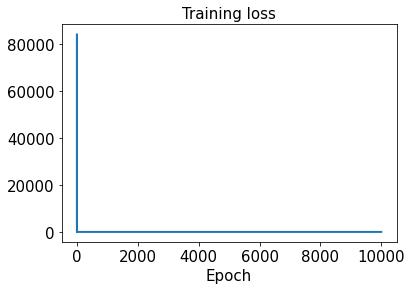

In [9]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

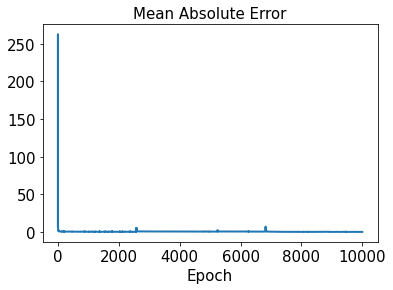

In [10]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [11]:
test_results = autoencoder.evaluate([x_test, tsr_test])

1/1 [==============================] - 0s 135ms/step - loss: 0.0123 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [12]:
decoded_imgs = autoencoder.predict([x_test, tsr_test])

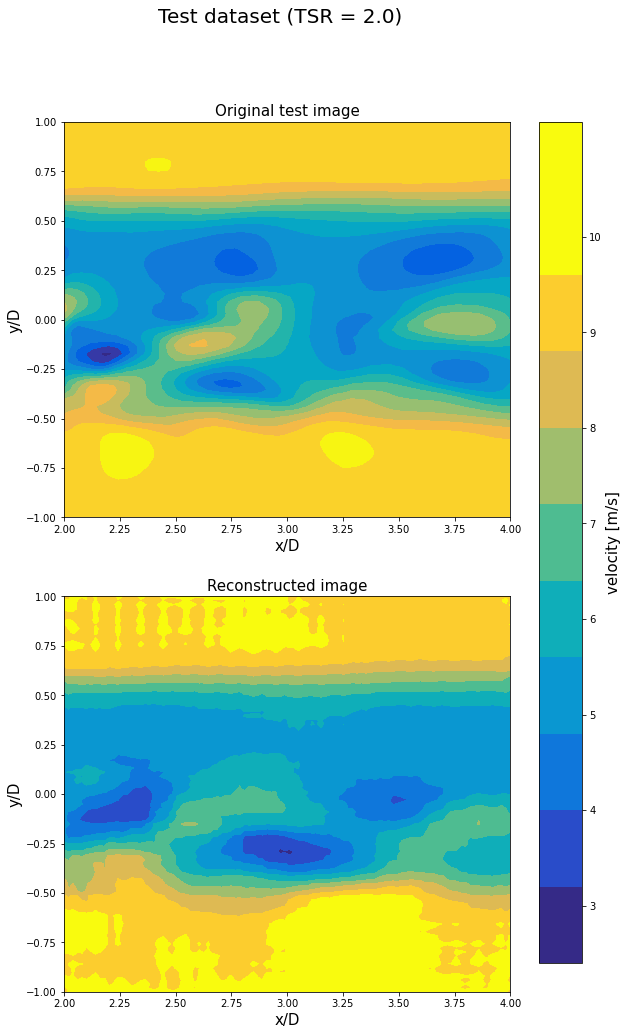

In [13]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [14]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[14.087608  ]
   [ 6.287119  ]
   [ 6.3548155 ]
   ...
   [ 1.839963  ]
   [ 3.0757177 ]
   [10.422865  ]]

  [[ 2.4109921 ]
   [ 5.6482234 ]
   [ 4.953637  ]
   ...
   [ 2.5986557 ]
   [ 2.2195122 ]
   [ 7.0024266 ]]

  [[ 2.4829311 ]
   [ 5.1824183 ]
   [ 4.171415  ]
   ...
   [ 2.5232382 ]
   [ 5.3014164 ]
   [ 6.1375933 ]]

  ...

  [[ 4.3334904 ]
   [ 3.6951878 ]
   [ 4.4420805 ]
   ...
   [ 1.5405368 ]
   [ 1.2129217 ]
   [ 0.27177882]]

  [[ 2.5854456 ]
   [ 6.8336806 ]
   [ 3.5125952 ]
   ...
   [ 0.9286965 ]
   [ 7.2059336 ]
   [ 1.9971815 ]]

  [[ 3.3529289 ]
   [ 3.7558424 ]
   [ 1.8065642 ]
   ...
   [ 2.650916  ]
   [ 3.3371444 ]
   [ 7.799665  ]]]]


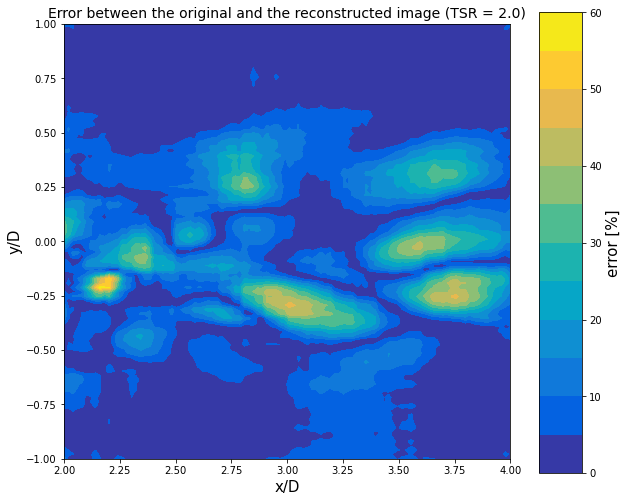

In [15]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

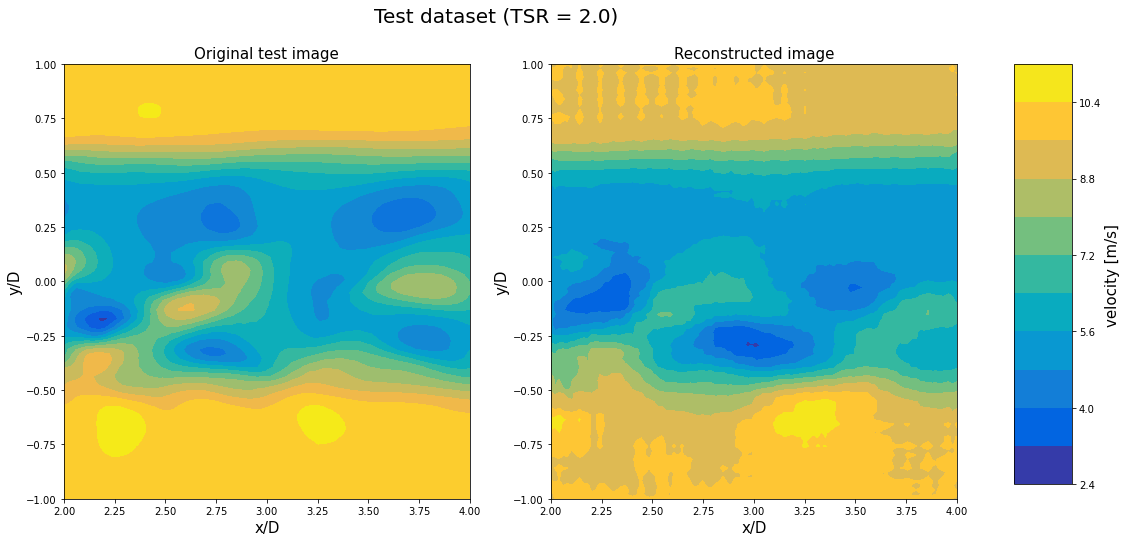

In [16]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [17]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict([train0, tsr_train[0]]).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [18]:
train0_orig = x_train[0].reshape(100, 100)

In [19]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [20]:
print(error_train0)

[[1.5559898e+01 8.3108501e+00 3.7729509e+00 ... 8.4962285e-01
  2.4490294e+00 1.0681160e+01]
 [4.0265936e-01 3.5366635e+00 2.2442493e+00 ... 2.4497130e+00
  2.0595663e+00 6.8193288e+00]
 [4.4767395e-01 2.6211784e+00 1.3558633e+00 ... 2.7784436e+00
  5.8473339e+00 6.5989003e+00]
 ...
 [5.3300673e-01 7.1145838e-01 1.8569913e+00 ... 2.8058186e+00
  2.1045644e+00 1.3890133e-02]
 [1.1924856e+00 3.5524278e+00 1.0462754e+00 ... 1.9471477e+00
  7.4820251e+00 2.4630716e+00]
 [7.7077293e+00 3.4160247e-01 1.5518370e+00 ... 2.0347464e+00
  4.4686899e+00 9.2022810e+00]]


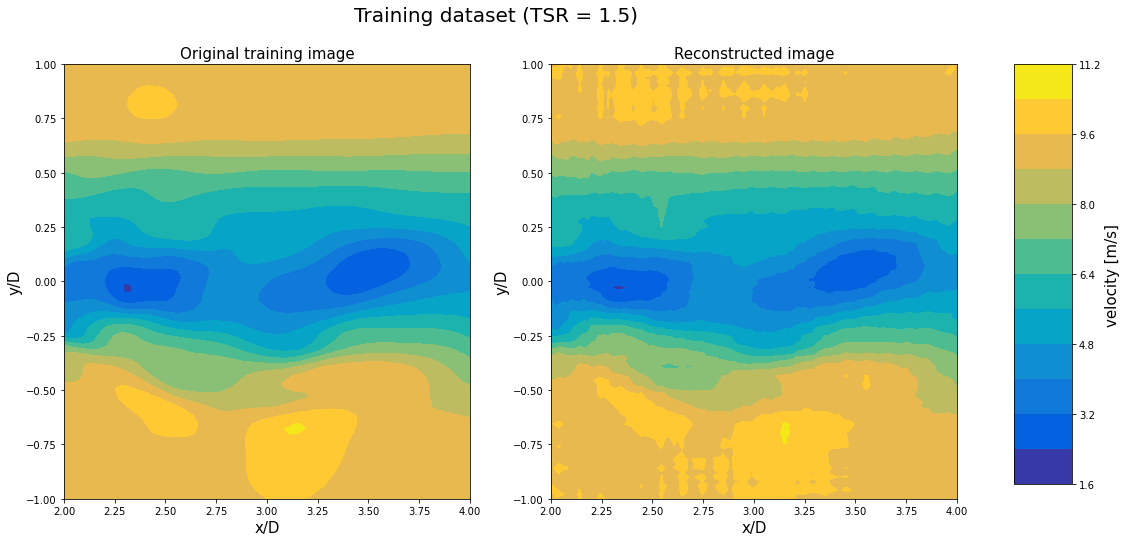

In [26]:
plt.figure(figsize=(16, 8))

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

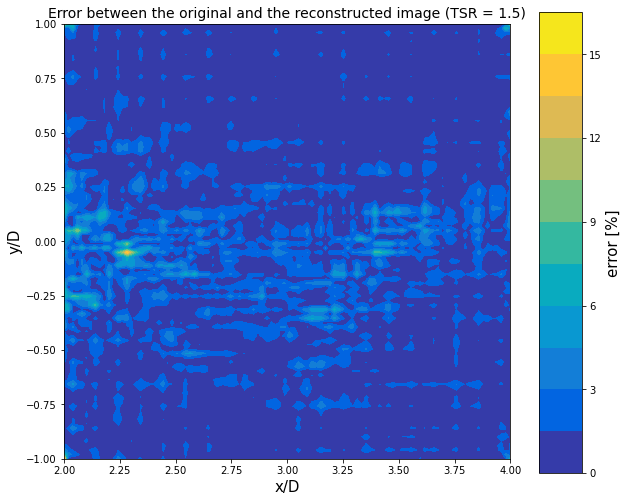

In [21]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

In [22]:
print(np.mean(error_train0))

1.088536


In [23]:
print(np.max(error_train0))

15.559898


In [24]:
print(np.mean(error_test))

7.6557627


In [25]:
print(np.max(error_test))

57.693768
